In [51]:
library(qiime2R)
library(tidyr)
library(tibble)
library(ggplot2)
library(phyloseq)
#library(biome)
library(phyloseq)
#library(metagenomeSeq)
library(tibble)
library(ANCOMBC)
library("tidyverse")

In [52]:
# Read in the 16S qza files and clean them up for phyloseq
ASVtable_16S <- read_qza("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/QiimeOutPut/2022_Process/tableV_BacArc_99_SCTLD.qza")
ASVtable_16S <- ASVtable_16S$data # Extract the count data from list
ASVtaxa_16S <- read_qza("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/QiimeOutPut/2022_Process/taxaVsearch_rep-seqs-dn-99_SCTLD.qza")
taxtable_16S <- ASVtaxa_16S$data %>% as_tibble() %>% separate(Taxon, sep=";",
c("Kingdom", "Phylum", "Class", "Order", "Family", "Genus", "Species"))  %>% 
unite("Taxa", Order:Genus, remove = FALSE) %>% arrange(Feature.ID) %>% mutate(ASV = 1:n()) %>% 
mutate(newcol = "ASV") %>%
unite("ASVs", newcol:ASV) 
# Convert taxonomy info to data frame with correct taxonomy labels
taxtable_16S <- taxtable_16S[-1,]
#asv_tab$asv_id <- rownames(asv_tab) # add a new column for ids
sample_info_tab_16S <- read.csv("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/metadata_for_qiime/SCTLD_meta_analysis_metadata.csv", header = T, row.names = 1,
na.strings = c("", "NA"))


Warning message:
“Expected 7 pieces. Missing pieces filled with `NA` in 70468 rows [2, 7, 11, 13, 15, 17, 21, 23, 27, 29, 34, 38, 39, 41, 43, 46, 47, 50, 54, 56, ...].”


In [53]:
physeq_16S <- phyloseq(otu_table(ASVtable_16S, taxa_are_rows= T),
tax_table(as.data.frame(taxtable_16S) %>% column_to_rownames("Feature.ID") %>%
as.matrix()), sample_data(sample_info_tab_16S))
physeq_16S
#taxa_names(physeq_16S) <- paste0("ASV", seq(ntaxa(physeq_16S)))

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 119455 taxa and 2425 samples ]
sample_data() Sample Data:       [ 2425 samples by 68 sample variables ]
tax_table()   Taxonomy Table:    [ 119455 taxa by 10 taxonomic ranks ]

In [54]:
sample_info_tab_16S$sample_type <- factor(sample_info_tab_16S$sample_type, 
    levels = c("Seawater", "Mucus", "TissueSlurry", "TissueSlurry_Skeleton", "Sediment"))

sample_info_tab_16S$tissue_type <- factor(sample_info_tab_16S$tissue_type, 
    levels = c("AH", "DU", "DL"))

In [55]:
sub_samples = c("TissueSlurry", "Mucus", "TissueSlurry_Skeleton", "Seawater", "Sediment")

sub_samples2 = c("TissueSlurry", "Mucus", "TissueSlurry_Skeleton")

ps =subset_samples(physeq_16S, sample_type %in% sub_samples & Alias !="AcroporaDisease")
ps

ps = filter_taxa(ps, function(x) sum(x > 20) > (0.015*length(x)), TRUE)
ps
  
                 
ps.coral_TL =subset_samples(physeq_16S, sample_type %in% sub_samples2 & Alias !="AcroporaDisease")
ps.coral_TL             
                 
ps.coral_TL = filter_taxa(ps.coral_TL, function(x) sum(x > 10) > (0.20*length(x)), TRUE)
ps.coral_TL              


ps.coral.TS =subset_samples(physeq_16S, sample_type == "TissueSlurry" &
                        Alias !="AcroporaDisease")
ps.coral.TS
                          
ps.coral.TS = filter_taxa(ps.coral.TS, function(x) sum(x > 5) > (0.30*length(x)), TRUE)
ps.coral.TS  
                          
ps.coral.TSS =subset_samples(physeq_16S, sample_type == "TissueSlurry_Skeleton" &
                        Alias !="AcroporaDisease")
ps.coral.TSS
                          
ps.coral.TSS = filter_taxa(ps.coral.TSS, function(x) sum(x > 3) > (0.30*length(x)), TRUE)
ps.coral.TSS                          

ps.coral.M = subset_samples(physeq_16S, sample_type == "Mucus" &
                        Alias !="AcroporaDisease")
ps.coral.M

                           
ps.coral.M = filter_taxa(ps.coral.M, function(x) sum(x > 5) > (0.30*length(x)), TRUE)
ps.coral.M                         

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 119455 taxa and 2268 samples ]
sample_data() Sample Data:       [ 2268 samples by 68 sample variables ]
tax_table()   Taxonomy Table:    [ 119455 taxa by 10 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 3031 taxa and 2268 samples ]
sample_data() Sample Data:       [ 2268 samples by 68 sample variables ]
tax_table()   Taxonomy Table:    [ 3031 taxa by 10 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 119455 taxa and 1937 samples ]
sample_data() Sample Data:       [ 1937 samples by 68 sample variables ]
tax_table()   Taxonomy Table:    [ 119455 taxa by 10 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 161 taxa and 1937 samples ]
sample_data() Sample Data:       [ 1937 samples by 68 sample variables ]
tax_table()   Taxonomy Table:    [ 161 taxa by 10 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 119455 taxa and 1491 samples ]
sample_data() Sample Data:       [ 1491 samples by 68 sample variables ]
tax_table()   Taxonomy Table:    [ 119455 taxa by 10 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 102 taxa and 1491 samples ]
sample_data() Sample Data:       [ 1491 samples by 68 sample variables ]
tax_table()   Taxonomy Table:    [ 102 taxa by 10 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 119455 taxa and 53 samples ]
sample_data() Sample Data:       [ 53 samples by 68 sample variables ]
tax_table()   Taxonomy Table:    [ 119455 taxa by 10 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 37 taxa and 53 samples ]
sample_data() Sample Data:       [ 53 samples by 68 sample variables ]
tax_table()   Taxonomy Table:    [ 37 taxa by 10 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 119455 taxa and 393 samples ]
sample_data() Sample Data:       [ 393 samples by 68 sample variables ]
tax_table()   Taxonomy Table:    [ 119455 taxa by 10 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 86 taxa and 393 samples ]
sample_data() Sample Data:       [ 393 samples by 68 sample variables ]
tax_table()   Taxonomy Table:    [ 86 taxa by 10 taxonomic ranks ]

In [56]:
out = ancombc(phyloseq = ps.coral.TSS, formula = "tissue_type", 
              p_adj_method = "fdr", zero_cut = 0.90, lib_cut = 100, 
              group ="tissue_type" , struc_zero = TRUE, neg_lb = FALSE, tol = 1e-5, 
              max_iter = 100, conserve = TRUE, alpha = 0.001, global = TRUE)

res = out$res
res_global = out$res_global

In [58]:
df_fig1 = data.frame(res$W * res$diff_abn, check.names = FALSE) %>% 
  rownames_to_column("Feature.ID")

head(df_fig1, n=2)

df_fig2 = data.frame(res$se * res$diff_abn, check.names = FALSE) %>% 
  rownames_to_column("Feature.ID")
colnames(df_fig2)[-1] = paste0(colnames(df_fig2)[-1], "SD")
head(df_fig2, n=2)

df_fig = df_fig1 %>% left_join(df_fig2, by = "Feature.ID") %>%
  transmute(Feature.ID, tissue_typeDU, tissue_typeDUSD)%>%
  mutate(group = ifelse(tissue_typeDU > 0, "AH", "DU"))
df_fig$Feature.ID = factor(df_fig$Feature.ID, levels = df_fig$Feature.ID)

head(df_fig, n=2)


sigs=res$diff_abn %>% as.data.frame() %>%
select(tissue_typeDL)  %>%
filter(tissue_typeDL=="TRUE") %>%
rownames_to_column("Feature.ID") %>%
rename(Sig=tissue_typeDL)
head(sigs, n=2)


df_fig1 = df_fig %>% left_join(as.data.frame(taxtable_16S), by="Feature.ID") %>% 
inner_join(sigs,  by="Feature.ID") %>% unite("Taxa", Order:Genus, remove = FALSE)

df_fig_SS_DU = df_fig %>% left_join(as.data.frame(taxtable_16S), by="Feature.ID") %>% 
inner_join(sigs,  by="Feature.ID")  %>% filter(tissue_typeDU > 1.5 | tissue_typeDU < -1.5)  %>%
unite("Taxa", Order:Genus, remove = FALSE) %>%
mutate(Compartment = "Tissue Slurry Skeleton")
df_fig_SS_DU 

,Feature.ID,tissue_typeDL,tissue_typeDU
,<chr>,<dbl>,<dbl>
1,944c108b6e81ffecad1fda219fbe53f9,0,0
2,32ea3d9b3e6491a490e9a3900510a658,0,0


,Feature.ID,tissue_typeDLSD,tissue_typeDUSD
,<chr>,<dbl>,<dbl>
1,944c108b6e81ffecad1fda219fbe53f9,0,0
2,32ea3d9b3e6491a490e9a3900510a658,0,0


,Feature.ID,tissue_typeDU,tissue_typeDUSD,group
,<fct>,<dbl>,<dbl>,<chr>
1,944c108b6e81ffecad1fda219fbe53f9,0,0,DU
2,32ea3d9b3e6491a490e9a3900510a658,0,0,DU


,Feature.ID,Sig
,<chr>,<lgl>
1,24712789d715449daaa27de29528a23e,TRUE
2,69b9e715eb00d1c523dc38a57e7b8f05,TRUE


Feature.ID,tissue_typeDU,tissue_typeDUSD,group,Kingdom,Phylum,Class,Order,Taxa,Family,Genus,Species,Consensus,ASVs,Sig,Compartment
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<lgl>,<chr>
69b9e715eb00d1c523dc38a57e7b8f05,-2.639841,0.8577884,DU,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Burkholderiales,o__Burkholderiales_ f__Alcaligenaceae_ g__Achromobacter,f__Alcaligenaceae,g__Achromobacter,NA,1,ASV_60577,TRUE,Tissue Slurry Skeleton


In [61]:
df_fig1 = data.frame(res$W * res$diff_abn, check.names = FALSE) %>% 
 rownames_to_column("Feature.ID")

head(df_fig1, n=2)

df_fig2 = data.frame(res$se * res$diff_abn, check.names = FALSE) %>% 
rownames_to_column("Feature.ID")
colnames(df_fig2)[-1] = paste0(colnames(df_fig2)[-1], "SD")
head(df_fig2, n=2)

df_fig = df_fig1 %>% left_join(df_fig2, by = "Feature.ID") %>%
  transmute(Feature.ID, tissue_typeDL, tissue_typeDLSD)%>%
  mutate(group = ifelse(tissue_typeDL > 0, "AH", "DL"))
df_fig$Feature.ID = factor(df_fig$Feature.ID, levels = df_fig$Feature.ID)

head(df_fig, n=2)


sigs=res$diff_abn %>% as.data.frame() %>%
select(tissue_typeDL)  %>%
filter(tissue_typeDL=="TRUE") %>%
rownames_to_column("Feature.ID") %>%
rename(Sig=tissue_typeDL)
head(sigs)


df_fig1 = df_fig %>% left_join(as.data.frame(taxtable_16S), by="Feature.ID") %>% 
inner_join(sigs,  by="Feature.ID") %>% unite("Taxa", Order:Genus, remove = FALSE)

dim(df_fig1)
head(df_fig1)


df_fig_SS = df_fig %>% left_join(as.data.frame(taxtable_16S), by="Feature.ID") %>% 
inner_join(sigs,  by="Feature.ID")  %>% 
filter(tissue_typeDL > 1.5 | tissue_typeDL < -1.5)  %>% 
unite("Taxa", Order:Genus, remove = FALSE) %>%
mutate(Compartment = "Tissue Slurry Skeleton")

df_fig_SS

,Feature.ID,tissue_typeDL,tissue_typeDU
,<chr>,<dbl>,<dbl>
1,944c108b6e81ffecad1fda219fbe53f9,0,0
2,32ea3d9b3e6491a490e9a3900510a658,0,0


,Feature.ID,tissue_typeDLSD,tissue_typeDUSD
,<chr>,<dbl>,<dbl>
1,944c108b6e81ffecad1fda219fbe53f9,0,0
2,32ea3d9b3e6491a490e9a3900510a658,0,0


,Feature.ID,tissue_typeDL,tissue_typeDLSD,group
,<fct>,<dbl>,<dbl>,<chr>
1,944c108b6e81ffecad1fda219fbe53f9,0,0,DL
2,32ea3d9b3e6491a490e9a3900510a658,0,0,DL


,Feature.ID,Sig
,<chr>,<lgl>
1,24712789d715449daaa27de29528a23e,TRUE
2,69b9e715eb00d1c523dc38a57e7b8f05,TRUE


[1]  2 15

,Feature.ID,tissue_typeDL,tissue_typeDLSD,group,Kingdom,Phylum,Class,Order,Taxa,Family,Genus,Species,Consensus,ASVs,Sig
,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<lgl>
1,24712789d715449daaa27de29528a23e,-2.749689,0.7162627,DL,d__Archaea,p__Crenarchaeota,c__Nitrososphaeria,o__Nitrosopumilales,o__Nitrosopumilales_ f__Nitrosopumilaceae_ g__Candidatus_Nitrosopumilus,f__Nitrosopumilaceae,g__Candidatus_Nitrosopumilus,s__uncultured_archaeon,0.6666667,ASV_21132,TRUE
2,69b9e715eb00d1c523dc38a57e7b8f05,2.018663,1.4880079,AH,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Burkholderiales,o__Burkholderiales_ f__Alcaligenaceae_ g__Achromobacter,f__Alcaligenaceae,g__Achromobacter,NA,1.0000000,ASV_60577,TRUE


Feature.ID,tissue_typeDL,tissue_typeDLSD,group,Kingdom,Phylum,Class,Order,Taxa,Family,Genus,Species,Consensus,ASVs,Sig,Compartment
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<lgl>,<chr>
24712789d715449daaa27de29528a23e,-2.749689,0.7162627,DL,d__Archaea,p__Crenarchaeota,c__Nitrososphaeria,o__Nitrosopumilales,o__Nitrosopumilales_ f__Nitrosopumilaceae_ g__Candidatus_Nitrosopumilus,f__Nitrosopumilaceae,g__Candidatus_Nitrosopumilus,s__uncultured_archaeon,0.6666667,ASV_21132,TRUE,Tissue Slurry Skeleton
69b9e715eb00d1c523dc38a57e7b8f05,2.018663,1.4880079,AH,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Burkholderiales,o__Burkholderiales_ f__Alcaligenaceae_ g__Achromobacter,f__Alcaligenaceae,g__Achromobacter,NA,1.0000000,ASV_60577,TRUE,Tissue Slurry Skeleton


In [62]:
ps_sigs_SS=phyloseq(otu_table(physeq_16S, taxa_are_rows= T),
tax_table(as.data.frame(df_fig_SS) %>% column_to_rownames("Feature.ID") %>%
as.matrix()), sample_data(sample_info_tab_16S))
ps_sigs_SS


ps_sigs_SS_DU=phyloseq(otu_table(physeq_16S, taxa_are_rows= T),
tax_table(as.data.frame(df_fig_SS_DU) %>% column_to_rownames("Feature.ID") %>%
as.matrix()), sample_data(sample_info_tab_16S))
ps_sigs_SS_DU

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 2 taxa and 2425 samples ]
sample_data() Sample Data:       [ 2425 samples by 68 sample variables ]
tax_table()   Taxonomy Table:    [ 2 taxa by 15 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1 taxa and 2425 samples ]
sample_data() Sample Data:       [ 2425 samples by 68 sample variables ]
tax_table()   Taxonomy Table:    [ 1 taxa by 15 taxonomic ranks ]

In [63]:
out = ancombc(phyloseq = ps.coral.TS, formula = "tissue_type", 
              p_adj_method = "fdr", zero_cut = 0.90, lib_cut = 100, 
              group ="tissue_type" , struc_zero = TRUE, neg_lb = FALSE, tol = 1e-5, 
              max_iter = 100, conserve = TRUE, alpha = 0.001, global = TRUE)

res = out$res
res_global = out$res_global

In [65]:
df_fig1 = data.frame(res$W * res$diff_abn, check.names = FALSE) %>% 
  rownames_to_column("Feature.ID")

head(df_fig1)

df_fig2 = data.frame(res$se * res$diff_abn, check.names = FALSE) %>% 
  rownames_to_column("Feature.ID")
colnames(df_fig2)[-1] = paste0(colnames(df_fig2)[-1], "SD")
head(df_fig2, n=2)

df_fig = df_fig1 %>% left_join(df_fig2, by = "Feature.ID") %>%
  transmute(Feature.ID, tissue_typeDL, tissue_typeDLSD)%>%
  mutate(group = ifelse(tissue_typeDL > 0, "DL", "AH"))
df_fig$Feature.ID = factor(df_fig$Feature.ID, levels = df_fig$Feature.ID)

head(df_fig, n=2)


sigs=res$diff_abn %>% as.data.frame() %>%
select(tissue_typeDL)  %>%
filter(tissue_typeDL=="TRUE") %>%
rownames_to_column("Feature.ID") %>%
rename(Sig=tissue_typeDL)
head(sigs, n=2)



df_fig1 = df_fig %>% left_join(as.data.frame(taxtable_16S), by="Feature.ID") %>% 
inner_join(sigs,  by="Feature.ID") %>% unite("Taxa", Order:Genus, remove = FALSE)

dim(df_fig1)
head(df_fig1, n=2)


df_fig_TS = df_fig %>% left_join(as.data.frame(taxtable_16S), by="Feature.ID") %>% 
inner_join(sigs,  by="Feature.ID") %>% 
filter(tissue_typeDL > 1.5 | tissue_typeDL < -1.5) %>%
unite("Taxa", Order:Genus, remove = FALSE) %>%
mutate(Compartment = "Tissue Slurry")
head(df_fig_TS, n=2)

,Feature.ID,tissue_typeDL,tissue_typeDU
,<chr>,<dbl>,<dbl>
1,944c108b6e81ffecad1fda219fbe53f9,-5.032948,0.000000
2,b12f1ebb5d05e1c88a9f265adb80fc55,9.749459,-3.890139
3,5ea4e6d172010676d104e0d06b74eb20,0.000000,9.798776
4,7df259fe05818b722e6f40845a657dc8,4.597978,-5.962707
5,c6b98c58f5a8f184cc1b130f66f944ab,6.605426,-5.473817
6,c91441ff2784a4d8df6eca1b945e16e3,0.000000,0.000000


,Feature.ID,tissue_typeDLSD,tissue_typeDUSD
,<chr>,<dbl>,<dbl>
1,944c108b6e81ffecad1fda219fbe53f9,0.2036784,0.0000000
2,b12f1ebb5d05e1c88a9f265adb80fc55,0.1779336,0.1971235


,Feature.ID,tissue_typeDL,tissue_typeDLSD,group
,<fct>,<dbl>,<dbl>,<chr>
1,944c108b6e81ffecad1fda219fbe53f9,-5.032948,0.2036784,AH
2,b12f1ebb5d05e1c88a9f265adb80fc55,9.749459,0.1779336,DL


,Feature.ID,Sig
,<chr>,<lgl>
1,944c108b6e81ffecad1fda219fbe53f9,TRUE
2,b12f1ebb5d05e1c88a9f265adb80fc55,TRUE


[1] 44 15

,Feature.ID,tissue_typeDL,tissue_typeDLSD,group,Kingdom,Phylum,Class,Order,Taxa,Family,Genus,Species,Consensus,ASVs,Sig
,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<lgl>
1,944c108b6e81ffecad1fda219fbe53f9,-5.032948,0.2036784,AH,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Ga0077536,o__Ga0077536_ f__Ga0077536_ g__Ga0077536,f__Ga0077536,g__Ga0077536,s__uncultured_bacterium,1.0000000,ASV_85339,TRUE
2,b12f1ebb5d05e1c88a9f265adb80fc55,9.749459,0.1779336,DL,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhizobiales,o__Rhizobiales_ f__Rhizobiaceae_ g__Cohaesibacter,f__Rhizobiaceae,g__Cohaesibacter,s__uncultured_bacterium,0.6666667,ASV_101999,TRUE


,Feature.ID,tissue_typeDL,tissue_typeDLSD,group,Kingdom,Phylum,Class,Order,Taxa,Family,Genus,Species,Consensus,ASVs,Sig,Compartment
,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<lgl>,<chr>
1,944c108b6e81ffecad1fda219fbe53f9,-5.032948,0.2036784,AH,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Ga0077536,o__Ga0077536_ f__Ga0077536_ g__Ga0077536,f__Ga0077536,g__Ga0077536,s__uncultured_bacterium,1.0000000,ASV_85339,TRUE,Tissue Slurry
2,b12f1ebb5d05e1c88a9f265adb80fc55,9.749459,0.1779336,DL,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhizobiales,o__Rhizobiales_ f__Rhizobiaceae_ g__Cohaesibacter,f__Rhizobiaceae,g__Cohaesibacter,s__uncultured_bacterium,0.6666667,ASV_101999,TRUE,Tissue Slurry


In [66]:
df_fig_TS %>%
arrange(-tissue_typeDL) %>%
head()

df_fig_TS %>%
group_by(Order, group) %>%
  summarise(total = n()) %>%
arrange(-total) %>%
head()

,Feature.ID,tissue_typeDL,tissue_typeDLSD,group,Kingdom,Phylum,Class,Order,Taxa,Family,Genus,Species,Consensus,ASVs,Sig,Compartment
,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<lgl>,<chr>
1,07be68b1341287b925b9a1688d7569f6,15.769552,0.1715821,DL,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,o__Rhodobacterales_ f__Rhodobacteraceae_NA,f__Rhodobacteraceae,NA,NA,1.0000000,ASV_4523,TRUE,Tissue Slurry
2,984891d363cd643f761c3c57425db15d,13.460179,0.1588868,DL,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,o__Rhodobacterales_ f__Rhodobacteraceae_ g__Tropicibacter,f__Rhodobacteraceae,g__Tropicibacter,NA,0.6666667,ASV_87702,TRUE,Tissue Slurry
3,a41ce4b6f4fe0c5a32c555f986280c11,11.573112,0.1772908,DL,d__Bacteria,p__Firmicutes,c__Clostridia,o__Peptostreptococcales-Tissierellales,o__Peptostreptococcales-Tissierellales_ f__Fusibacteraceae_ g__Fusibacter,f__Fusibacteraceae,g__Fusibacter,s__uncultured_bacterium,1.0000000,ASV_94598,TRUE,Tissue Slurry
4,e02348a66ee270965be70925eecac68d,10.370662,0.1709087,DL,d__Bacteria,p__Firmicutes,c__Clostridia,o__Peptostreptococcales-Tissierellales,o__Peptostreptococcales-Tissierellales_ f__Fusibacteraceae_ g__Fusibacter,f__Fusibacteraceae,g__Fusibacter,NA,1.0000000,ASV_129025,TRUE,Tissue Slurry
5,1696d7941bdae3ff494f13fc3f318a57,10.081449,0.2072436,DL,d__Bacteria,p__Desulfobacterota,c__Desulfovibrionia,o__Desulfovibrionales,o__Desulfovibrionales_ f__Desulfovibrionaceae_ g__Halodesulfovibrio,f__Desulfovibrionaceae,g__Halodesulfovibrio,s__Halodesulfovibrio_aestuarii,0.6666667,ASV_13041,TRUE,Tissue Slurry
6,b12f1ebb5d05e1c88a9f265adb80fc55,9.749459,0.1779336,DL,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhizobiales,o__Rhizobiales_ f__Rhizobiaceae_ g__Cohaesibacter,f__Rhizobiaceae,g__Cohaesibacter,s__uncultured_bacterium,0.6666667,ASV_101999,TRUE,Tissue Slurry


`summarise()` has grouped output by 'Order'. You can override using the `.groups` argument.


Order,group,total
<chr>,<chr>,<int>
o__Rhodobacterales,DL,14
o__Peptostreptococcales-Tissierellales,DL,6
o__Bacteroidales,DL,2
o__Flavobacteriales,AH,2
o__Verrucomicrobiales,DL,2
o__Alteromonadales,AH,1


In [68]:
df_fig1 = data.frame(res$W * res$diff_abn, check.names = FALSE) %>% 
  rownames_to_column("Feature.ID")

head(df_fig1, n=2)

df_fig2 = data.frame(res$se * res$diff_abn, check.names = FALSE) %>% 
  rownames_to_column("Feature.ID")
colnames(df_fig2)[-1] = paste0(colnames(df_fig2)[-1], "SD")
head(df_fig2, n=2)

df_fig = df_fig1 %>% left_join(df_fig2, by = "Feature.ID") %>%
  transmute(Feature.ID, tissue_typeDU, tissue_typeDUSD)%>%
  mutate(group = ifelse(tissue_typeDU > 0, "DU", "AH"))
df_fig$Feature.ID = factor(df_fig$Feature.ID, levels = df_fig$Feature.ID)

head(df_fig, n=2)


sigs=res$diff_abn %>% as.data.frame() %>%
select(tissue_typeDU)  %>%
filter(tissue_typeDU=="TRUE") %>%
rownames_to_column("Feature.ID") %>%
rename(Sig=tissue_typeDU)
head(sigs, n=2)


df_fig1 = df_fig %>% left_join(as.data.frame(taxtable_16S), by="Feature.ID") %>% 
inner_join(sigs,  by="Feature.ID") %>% unite("Taxa", Order:Genus, remove = FALSE)

df_fig_TS_DU = df_fig %>% left_join(as.data.frame(taxtable_16S), by="Feature.ID") %>% 
inner_join(sigs,  by="Feature.ID")  %>% filter(tissue_typeDU > 1.5 | tissue_typeDU < -1.5) %>% 
unite("Taxa", Order:Genus, remove = FALSE) %>%
mutate(Compartment = "Tissue Slurry")%>%
arrange(-tissue_typeDU)
head(df_fig_TS_DU, n=2)

,Feature.ID,tissue_typeDL,tissue_typeDU
,<chr>,<dbl>,<dbl>
1,944c108b6e81ffecad1fda219fbe53f9,-5.032948,0.000000
2,b12f1ebb5d05e1c88a9f265adb80fc55,9.749459,-3.890139


,Feature.ID,tissue_typeDLSD,tissue_typeDUSD
,<chr>,<dbl>,<dbl>
1,944c108b6e81ffecad1fda219fbe53f9,0.2036784,0.0000000
2,b12f1ebb5d05e1c88a9f265adb80fc55,0.1779336,0.1971235


,Feature.ID,tissue_typeDU,tissue_typeDUSD,group
,<fct>,<dbl>,<dbl>,<chr>
1,944c108b6e81ffecad1fda219fbe53f9,0.000000,0.0000000,AH
2,b12f1ebb5d05e1c88a9f265adb80fc55,-3.890139,0.1971235,AH


,Feature.ID,Sig
,<chr>,<lgl>
1,b12f1ebb5d05e1c88a9f265adb80fc55,TRUE
2,5ea4e6d172010676d104e0d06b74eb20,TRUE


,Feature.ID,tissue_typeDU,tissue_typeDUSD,group,Kingdom,Phylum,Class,Order,Taxa,Family,Genus,Species,Consensus,ASVs,Sig,Compartment
,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<lgl>,<chr>
1,5a958ad2674d21074729f85cef9bf4a2,20.03517,0.2146648,DU,d__Bacteria,p__Cyanobacteria,c__Cyanobacteriia,o__Synechococcales,o__Synechococcales_ f__Cyanobiaceae_ g__Synechococcus_CC9902,f__Cyanobiaceae,g__Synechococcus_CC9902,s__unidentified_marine,0.6666667,ASV_52045,TRUE,Tissue Slurry
2,83cebf00aca1b32cb3aa9d066dcd9008,12.71229,0.2795857,DU,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Flavobacteriales,o__Flavobacteriales_ f__Flavobacteriaceae_ g__NS5_marine_group,f__Flavobacteriaceae,g__NS5_marine_group,s__uncultured_Flavobacterium,0.6666667,ASV_75801,TRUE,Tissue Slurry


In [71]:
df_fig_TS_DU %>%
group_by(Order, group) %>%
  summarise(total = n()) %>%
arrange(-total) %>%
head()

`summarise()` has grouped output by 'Order'. You can override using the `.groups` argument.


Order,group,total
<chr>,<chr>,<int>
o__Rhodobacterales,AH,13
o__Flavobacteriales,DU,9
o__Rhizobiales,AH,8
o__Actinomarinales,DU,2
o__Cellvibrionales,AH,2
o__Cytophagales,AH,2


In [70]:
ps_sigs_TS=phyloseq(otu_table(physeq_16S, taxa_are_rows= T),
tax_table(as.data.frame(df_fig_TS) %>% column_to_rownames("Feature.ID") %>%
as.matrix()), sample_data(sample_info_tab_16S))

ps_sigs_TS

ps_sigs_TS_DU=phyloseq(otu_table(physeq_16S, taxa_are_rows= T),
tax_table(as.data.frame(df_fig_TS_DU) %>% column_to_rownames("Feature.ID") %>%
as.matrix()), sample_data(sample_info_tab_16S))

ps_sigs_TS_DU

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 44 taxa and 2425 samples ]
sample_data() Sample Data:       [ 2425 samples by 68 sample variables ]
tax_table()   Taxonomy Table:    [ 44 taxa by 15 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 55 taxa and 2425 samples ]
sample_data() Sample Data:       [ 2425 samples by 68 sample variables ]
tax_table()   Taxonomy Table:    [ 55 taxa by 15 taxonomic ranks ]

In [72]:
out = ancombc(phyloseq = ps.coral.M, formula = "tissue_type", 
              p_adj_method = "fdr", zero_cut = 0.90, lib_cut = 100, 
              group ="tissue_type" , struc_zero = TRUE, neg_lb = FALSE, tol = 1e-5, 
              max_iter = 100, conserve = TRUE, alpha = 0.001, global = TRUE)

res = out$res
res_global = out$res_global

In [73]:
df_fig1 = data.frame(res$W * res$diff_abn, check.names = FALSE) %>% 
  rownames_to_column("Feature.ID")

head(df_fig1)

df_fig2 = data.frame(res$se * res$diff_abn, check.names = FALSE) %>% 
  rownames_to_column("Feature.ID")
colnames(df_fig2)[-1] = paste0(colnames(df_fig2)[-1], "SD")
head(df_fig2)

df_fig = df_fig1 %>% left_join(df_fig2, by = "Feature.ID") %>%
  transmute(Feature.ID, tissue_typeDL, tissue_typeDLSD)%>%
  mutate(group = ifelse(tissue_typeDL > 0, "DL", "AH"))
df_fig$Feature.ID = factor(df_fig$Feature.ID, levels = df_fig$Feature.ID)

head(df_fig)


sigs=res$diff_abn %>% as.data.frame() %>%
select(tissue_typeDL)  %>%
filter(tissue_typeDL=="TRUE") %>%
rownames_to_column("Feature.ID") %>%
rename(Sig=tissue_typeDL)
head(sigs)



df_fig1 = df_fig %>% left_join(as.data.frame(taxtable_16S), by="Feature.ID") %>% 
inner_join(sigs,  by="Feature.ID") %>% unite("Taxa", Order:Genus, remove = FALSE)

dim(df_fig1)
head(df_fig1)


df_fig_M = df_fig %>% left_join(as.data.frame(taxtable_16S), by="Feature.ID") %>% 
inner_join(sigs,  by="Feature.ID") %>% 
filter(tissue_typeDU > 1.5 | tissue_typeDU < -1.5) %>% 
unite("Taxa", Order:Genus, remove = FALSE) %>%
mutate(Compartment = "Mucus")

head(df_fig_M, n=2)

,Feature.ID,tissue_typeDL,tissue_typeDU
,<chr>,<dbl>,<dbl>
1,5ea4e6d172010676d104e0d06b74eb20,0.0000000,4.35962029
2,ca349f9a464af37e05d4e51c6a162ba3,0.0000000,0.00000000
3,c91441ff2784a4d8df6eca1b945e16e3,0.0000000,-13.52542262
4,c9ec8d7403b1ce7a8e1661e6f4dc5646,-0.1672777,-0.08073135
5,df84a5521a71e034423dee45569b5796,0.0000000,6.03524570
6,2043c02d0849ae7bba53ee266ac15c49,0.0000000,0.00000000


,Feature.ID,tissue_typeDLSD,tissue_typeDUSD
,<chr>,<dbl>,<dbl>
1,5ea4e6d172010676d104e0d06b74eb20,0.0000000,0.2289832
2,ca349f9a464af37e05d4e51c6a162ba3,0.0000000,0.0000000
3,c91441ff2784a4d8df6eca1b945e16e3,0.0000000,0.3285883
4,c9ec8d7403b1ce7a8e1661e6f4dc5646,0.1251945,0.1711383
5,df84a5521a71e034423dee45569b5796,0.0000000,0.1784264
6,2043c02d0849ae7bba53ee266ac15c49,0.0000000,0.0000000


,Feature.ID,tissue_typeDL,tissue_typeDLSD,group
,<fct>,<dbl>,<dbl>,<chr>
1,5ea4e6d172010676d104e0d06b74eb20,0.0000000,0.0000000,AH
2,ca349f9a464af37e05d4e51c6a162ba3,0.0000000,0.0000000,AH
3,c91441ff2784a4d8df6eca1b945e16e3,0.0000000,0.0000000,AH
4,c9ec8d7403b1ce7a8e1661e6f4dc5646,-0.1672777,0.1251945,AH
5,df84a5521a71e034423dee45569b5796,0.0000000,0.0000000,AH
6,2043c02d0849ae7bba53ee266ac15c49,0.0000000,0.0000000,AH


,Feature.ID,Sig
,<chr>,<lgl>
1,c9ec8d7403b1ce7a8e1661e6f4dc5646,TRUE
2,bde147c1764d6c0cc326d13b2168a95b,TRUE
3,2dd4ba97f64d8b55c7a8dc32321b9b17,TRUE
4,8f021ce8e37ca3cc8345e2afd5207eec,TRUE
5,1696d7941bdae3ff494f13fc3f318a57,TRUE
6,5ccf756aaef284913d9eb9762dc81693,TRUE


[1] 39 15

,Feature.ID,tissue_typeDL,tissue_typeDLSD,group,Kingdom,Phylum,Class,Order,Taxa,Family,Genus,Species,Consensus,ASVs,Sig
,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<lgl>
1,c9ec8d7403b1ce7a8e1661e6f4dc5646,-0.16727765,0.1251945,AH,d__Bacteria,p__Marinimicrobia_(SAR406_clade),c__Marinimicrobia_(SAR406_clade),o__Marinimicrobia_(SAR406_clade),o__Marinimicrobia_(SAR406_clade)_ f__Marinimicrobia_(SAR406_clade)_ g__Marinimicrobia_(SAR406_clade),f__Marinimicrobia_(SAR406_clade),g__Marinimicrobia_(SAR406_clade),s__uncultured_bacterium,1.0000000,ASV_116139,TRUE
2,bde147c1764d6c0cc326d13b2168a95b,10.68246911,0.3434200,DL,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Flavobacteriales,o__Flavobacteriales_ f__Flavobacteriaceae_ g__uncultured,f__Flavobacteriaceae,g__uncultured,NA,1.0000000,ASV_109302,TRUE
3,2dd4ba97f64d8b55c7a8dc32321b9b17,0.07671978,0.1296139,DL,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Flavobacteriales,o__Flavobacteriales_ f__Flavobacteriaceae_ g__NS5_marine_group,f__Flavobacteriaceae,g__NS5_marine_group,s__uncultured_Flavobacteriaceae,0.6666667,ASV_26494,TRUE
4,8f021ce8e37ca3cc8345e2afd5207eec,9.59464266,0.3849296,DL,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Alteromonadales,o__Alteromonadales_ f__Alteromonadaceae_ g__Alteromonas,f__Alteromonadaceae,g__Alteromonas,s__uncultured_Alteromonas,0.6666667,ASV_82221,TRUE
5,1696d7941bdae3ff494f13fc3f318a57,13.96265077,0.3541347,DL,d__Bacteria,p__Desulfobacterota,c__Desulfovibrionia,o__Desulfovibrionales,o__Desulfovibrionales_ f__Desulfovibrionaceae_ g__Halodesulfovibrio,f__Desulfovibrionaceae,g__Halodesulfovibrio,s__Halodesulfovibrio_aestuarii,0.6666667,ASV_13041,TRUE
6,5ccf756aaef284913d9eb9762dc81693,11.86662300,0.3851856,DL,d__Bacteria,p__Verrucomicrobiota,c__Verrucomicrobiae,o__Verrucomicrobiales,o__Verrucomicrobiales_ f__Rubritaleaceae_ g__Rubritalea,f__Rubritaleaceae,g__Rubritalea,NA,1.0000000,ASV_53282,TRUE


ERROR: [1m[33mError[39m in [1m[1m`filter()`:[22m
[1m[22m[33m![39m Problem while computing `..1 = tissue_typeDU > 1.5 | tissue_typeDU < -1.5`.
[1mCaused by error:[22m
[33m![39m object 'tissue_typeDU' not found


In [74]:
df_fig_M %>%
arrange(-tissue_typeDL) %>%
head()

df_fig_M %>%
group_by(Order, group) %>%
  summarise(total = n()) %>%
arrange(-total) %>%
head()

,Feature.ID,tissue_typeDL,tissue_typeDLSD,group,Kingdom,Phylum,Class,Order,Taxa,Family,Genus,Species,Consensus,ASVs,Sig,Compartment
,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<lgl>,<chr>
1,1696d7941bdae3ff494f13fc3f318a57,13.96265,0.3541347,DL,d__Bacteria,p__Desulfobacterota,c__Desulfovibrionia,o__Desulfovibrionales,o__Desulfovibrionales_ f__Desulfovibrionaceae_ g__Halodesulfovibrio,f__Desulfovibrionaceae,g__Halodesulfovibrio,s__Halodesulfovibrio_aestuarii,0.6666667,ASV_13041,TRUE,Mucus
2,847d671bf309246d59ecd72d0be99d4f,13.18395,0.3533338,DL,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,o__Rhodobacterales_ f__Rhodobacteraceae_ g__Shimia,f__Rhodobacteraceae,g__Shimia,NA,1.0000000,ASV_76201,TRUE,Mucus
3,867fd18c6094b4353dd35b931d30fbb8,12.42808,0.3674495,DL,d__Bacteria,p__Verrucomicrobiota,c__Verrucomicrobiae,o__Verrucomicrobiales,o__Verrucomicrobiales_ f__Rubritaleaceae_ g__Rubritalea,f__Rubritaleaceae,g__Rubritalea,s__uncultured_bacterium,1.0000000,ASV_77317,TRUE,Mucus
4,63ceb7ef56b32b9b7f03a1bda63b4aa3,12.27072,0.4529957,DL,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,o__Rhodobacterales_ f__Rhodobacteraceae_NA,f__Rhodobacteraceae,NA,NA,1.0000000,ASV_57189,TRUE,Mucus
5,5ccf756aaef284913d9eb9762dc81693,11.86662,0.3851856,DL,d__Bacteria,p__Verrucomicrobiota,c__Verrucomicrobiae,o__Verrucomicrobiales,o__Verrucomicrobiales_ f__Rubritaleaceae_ g__Rubritalea,f__Rubritaleaceae,g__Rubritalea,NA,1.0000000,ASV_53282,TRUE,Mucus
6,a832f39e035e256ef32fe68f7da7f34d,11.37202,0.4059637,DL,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Beggiatoales,o__Beggiatoales_ f__Beggiatoaceae_ g__Candidatus_Marithrix,f__Beggiatoaceae,g__Candidatus_Marithrix,s__uncultured_bacterium,0.6666667,ASV_96918,TRUE,Mucus


`summarise()` has grouped output by 'Order'. You can override using the `.groups` argument.


Order,group,total
<chr>,<chr>,<int>
o__Rhodobacterales,DL,8
o__Alteromonadales,DL,4
o__Flavobacteriales,AH,4
o__Flavobacteriales,DL,4
o__Oceanospirillales,DL,2
o__Synechococcales,AH,2


In [76]:
df_fig1 = data.frame(res$W * res$diff_abn, check.names = FALSE) %>% 
  rownames_to_column("Feature.ID")

head(df_fig1)

df_fig2 = data.frame(res$se * res$diff_abn, check.names = FALSE) %>% 
  rownames_to_column("Feature.ID")
colnames(df_fig2)[-1] = paste0(colnames(df_fig2)[-1], "SD")
head(df_fig2)

df_fig = df_fig1 %>% left_join(df_fig2, by = "Feature.ID") %>%
  transmute(Feature.ID, tissue_typeDU, tissue_typeDUSD)%>%
  mutate(group = ifelse(tissue_typeDU > 0, "DU", "AH"))
df_fig$Feature.ID = factor(df_fig$Feature.ID, levels = df_fig$Feature.ID)

head(df_fig)


sigs=res$diff_abn %>% as.data.frame() %>%
select(tissue_typeDU)  %>%
filter(tissue_typeDU=="TRUE") %>%
rownames_to_column("Feature.ID") %>%
rename(Sig=tissue_typeDU)
head(sigs)


df_fig1 = df_fig %>% left_join(as.data.frame(taxtable_16S), by="Feature.ID") %>% 
inner_join(sigs,  by="Feature.ID") %>% unite("Taxa", Order:Genus, remove = FALSE)

df_fig_M_DU = df_fig %>% left_join(as.data.frame(taxtable_16S), by="Feature.ID") %>% 
inner_join(sigs,  by="Feature.ID")  %>% filter(tissue_typeDU > 1.5 | tissue_typeDU < -1.5)  %>%
unite("Taxa", Order:Genus, remove = FALSE) %>%
mutate(Compartment = "Mucus")
head(df_fig_TS_DU, n=2)

,Feature.ID,tissue_typeDL,tissue_typeDU
,<chr>,<dbl>,<dbl>
1,5ea4e6d172010676d104e0d06b74eb20,0.0000000,4.35962029
2,ca349f9a464af37e05d4e51c6a162ba3,0.0000000,0.00000000
3,c91441ff2784a4d8df6eca1b945e16e3,0.0000000,-13.52542262
4,c9ec8d7403b1ce7a8e1661e6f4dc5646,-0.1672777,-0.08073135
5,df84a5521a71e034423dee45569b5796,0.0000000,6.03524570
6,2043c02d0849ae7bba53ee266ac15c49,0.0000000,0.00000000


,Feature.ID,tissue_typeDLSD,tissue_typeDUSD
,<chr>,<dbl>,<dbl>
1,5ea4e6d172010676d104e0d06b74eb20,0.0000000,0.2289832
2,ca349f9a464af37e05d4e51c6a162ba3,0.0000000,0.0000000
3,c91441ff2784a4d8df6eca1b945e16e3,0.0000000,0.3285883
4,c9ec8d7403b1ce7a8e1661e6f4dc5646,0.1251945,0.1711383
5,df84a5521a71e034423dee45569b5796,0.0000000,0.1784264
6,2043c02d0849ae7bba53ee266ac15c49,0.0000000,0.0000000


,Feature.ID,tissue_typeDU,tissue_typeDUSD,group
,<fct>,<dbl>,<dbl>,<chr>
1,5ea4e6d172010676d104e0d06b74eb20,4.35962029,0.2289832,DU
2,ca349f9a464af37e05d4e51c6a162ba3,0.00000000,0.0000000,AH
3,c91441ff2784a4d8df6eca1b945e16e3,-13.52542262,0.3285883,AH
4,c9ec8d7403b1ce7a8e1661e6f4dc5646,-0.08073135,0.1711383,AH
5,df84a5521a71e034423dee45569b5796,6.03524570,0.1784264,DU
6,2043c02d0849ae7bba53ee266ac15c49,0.00000000,0.0000000,AH


,Feature.ID,Sig
,<chr>,<lgl>
1,5ea4e6d172010676d104e0d06b74eb20,TRUE
2,c91441ff2784a4d8df6eca1b945e16e3,TRUE
3,c9ec8d7403b1ce7a8e1661e6f4dc5646,TRUE
4,df84a5521a71e034423dee45569b5796,TRUE
5,b6e1b822189f49a1120e772e4a69cd0d,TRUE
6,bde147c1764d6c0cc326d13b2168a95b,TRUE


,Feature.ID,tissue_typeDU,tissue_typeDUSD,group,Kingdom,Phylum,Class,Order,Taxa,Family,Genus,Species,Consensus,ASVs,Sig,Compartment
,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<lgl>,<chr>
1,5a958ad2674d21074729f85cef9bf4a2,20.03517,0.2146648,DU,d__Bacteria,p__Cyanobacteria,c__Cyanobacteriia,o__Synechococcales,o__Synechococcales_ f__Cyanobiaceae_ g__Synechococcus_CC9902,f__Cyanobiaceae,g__Synechococcus_CC9902,s__unidentified_marine,0.6666667,ASV_52045,TRUE,Tissue Slurry
2,83cebf00aca1b32cb3aa9d066dcd9008,12.71229,0.2795857,DU,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Flavobacteriales,o__Flavobacteriales_ f__Flavobacteriaceae_ g__NS5_marine_group,f__Flavobacteriaceae,g__NS5_marine_group,s__uncultured_Flavobacterium,0.6666667,ASV_75801,TRUE,Tissue Slurry


In [77]:
df_fig_M_DU %>%
arrange(-tissue_typeDU) %>%
head()

df_fig_M_DU %>%
group_by(Order, group) %>%
  summarise(total = n()) %>%
arrange(-total) %>%
head()

,Feature.ID,tissue_typeDU,tissue_typeDUSD,group,Kingdom,Phylum,Class,Order,Taxa,Family,Genus,Species,Consensus,ASVs,Sig,Compartment
,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<lgl>,<chr>
1,83cebf00aca1b32cb3aa9d066dcd9008,6.325744,0.1876958,DU,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Flavobacteriales,o__Flavobacteriales_ f__Flavobacteriaceae_ g__NS5_marine_group,f__Flavobacteriaceae,g__NS5_marine_group,s__uncultured_Flavobacterium,0.6666667,ASV_75801,TRUE,Mucus
2,169309b0650fbee802be02e739eeefbb,6.187118,0.1941266,DU,d__Bacteria,p__Cyanobacteria,c__Cyanobacteriia,o__Synechococcales,o__Synechococcales_ f__Cyanobiaceae_ g__Cyanobium_PCC-6307,f__Cyanobiaceae,g__Cyanobium_PCC-6307,s__uncultured_cyanobacterium,0.6666667,ASV_13028,TRUE,Mucus
3,df84a5521a71e034423dee45569b5796,6.035246,0.1784264,DU,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Flavobacteriales,o__Flavobacteriales_ f__Flavobacteriaceae_ g__NS5_marine_group,f__Flavobacteriaceae,g__NS5_marine_group,s__uncultured_Flavobacteriaceae,0.6666667,ASV_128647,TRUE,Mucus
4,82eb6703b24ac1c5e2e7384217cb6747,5.837921,0.1623960,DU,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Flavobacteriales,o__Flavobacteriales_ f__Flavobacteriaceae_ g__NS5_marine_group,f__Flavobacteriaceae,g__NS5_marine_group,s__uncultured_bacterium,0.6666667,ASV_75251,TRUE,Mucus
5,293e3bc035269ee105768b681be3f107,5.451026,0.1711718,DU,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__SAR86_clade,o__SAR86_clade_ f__SAR86_clade_ g__SAR86_clade,f__SAR86_clade,g__SAR86_clade,s__uncultured_bacterium,0.6666667,ASV_23925,TRUE,Mucus
6,bcb850209fde2b286a1b06dc0f150b61,5.316636,0.1923666,DU,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Flavobacteriales,o__Flavobacteriales_ f__NS9_marine_group_ g__NS9_marine_group,f__NS9_marine_group,g__NS9_marine_group,s__uncultured_bacterium,1.0000000,ASV_108701,TRUE,Mucus


`summarise()` has grouped output by 'Order'. You can override using the `.groups` argument.


Order,group,total
<chr>,<chr>,<int>
o__Flavobacteriales,DU,8
o__Rhodobacterales,AH,7
o__Alteromonadales,AH,4
o__Oceanospirillales,AH,4
o__Francisellales,AH,3
o__Synechococcales,DU,3


In [78]:
ps_sigs_M=phyloseq(otu_table(physeq_16S, taxa_are_rows= T),
tax_table(as.data.frame(df_fig_M) %>% column_to_rownames("Feature.ID") %>%
as.matrix()), sample_data(sample_info_tab_16S))

ps_sigs_M


ps_sigs_M_DU=phyloseq(otu_table(physeq_16S, taxa_are_rows= T),
tax_table(as.data.frame(df_fig_M_DU) %>% column_to_rownames("Feature.ID") %>%
as.matrix()), sample_data(sample_info_tab_16S))
ps_sigs_M_DU

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 39 taxa and 2425 samples ]
sample_data() Sample Data:       [ 2425 samples by 68 sample variables ]
tax_table()   Taxonomy Table:    [ 39 taxa by 15 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 53 taxa and 2425 samples ]
sample_data() Sample Data:       [ 2425 samples by 68 sample variables ]
tax_table()   Taxonomy Table:    [ 53 taxa by 15 taxonomic ranks ]

In [81]:
#fix
ps_merged_sigs = merge_phyloseq(ps_sigs_TS, ps_sigs_SS, ps_sigs_M)
ps_merged_sigs

ps_merged_sigs_DU = merge_phyloseq(ps_sigs_TS_DU, ps_sigs_SS_DU, ps_sigs_M_DU)
ps_merged_sigs_DU

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 73 taxa and 2425 samples ]
sample_data() Sample Data:       [ 2425 samples by 68 sample variables ]
tax_table()   Taxonomy Table:    [ 73 taxa by 15 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 91 taxa and 2425 samples ]
sample_data() Sample Data:       [ 2425 samples by 68 sample variables ]
tax_table()   Taxonomy Table:    [ 91 taxa by 15 taxonomic ranks ]

In [80]:

sigs_TS = ps_sigs_TS %>%
#transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
microbiome::transform("compositional") %>%
psmelt()


sigs_SS = ps_sigs_SS %>%
#transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
microbiome::transform("compositional") %>%
psmelt()

sigs_M = ps_sigs_M %>%
#transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
microbiome::transform("compositional") %>%
psmelt()



sigs_melt_DU = ps_merged_sigs_DU %>%
#transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
microbiome::transform("compositional") %>%
psmelt()    


sigs_melt_DL = ps_merged_sigs %>%
#transform_sample_counts(function(x) {x/sum(x)} ) %>% # Transform to rel. abundance
microbiome::transform("compositional") %>%
psmelt() 

In [82]:
bind_sigs = bind_rows(df_fig_TS, df_fig_M, df_fig_SS)

bind_sigs_DU = bind_rows(df_fig_TS_DU, df_fig_M_DU, df_fig_SS_DU)

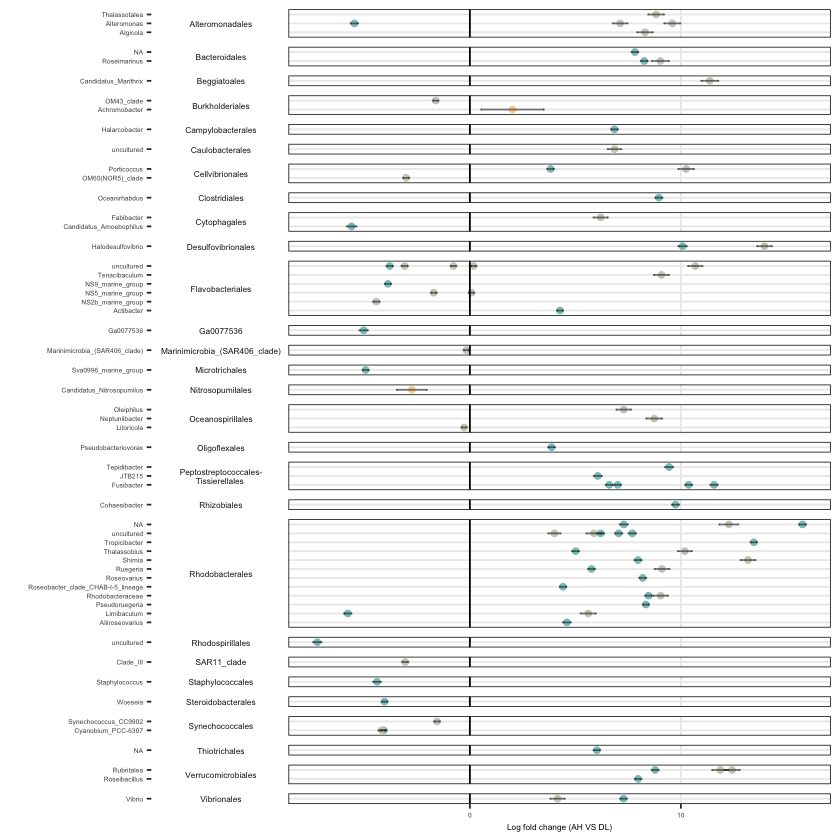

In [100]:
fig_sigs_DL = as.data.frame(bind_sigs) %>%
filter(Order!="NA") %>%
#filter(tissue_typeDL > 1.5 | tissue_typeDL < -1.5) %>%
mutate_if(
                is.character, 
                stringr::str_replace_all, 
                pattern = "o__",
                replacement = "")  %>%

mutate_if(
                is.character, 
                stringr::str_replace_all, 
                pattern = "g__",
                replacement = "")  %>%
mutate_if(
                is.character, 
                stringr::str_replace_all, 
                pattern = "Peptostreptococcales-Tissierellales", 
                replacement = "Peptostreptococcales-\nTissierellales")  %>%
ggplot( 
           aes(tissue_typeDL, y = Genus)
              ) + 
geom_point(aes(color=Compartment)) +
   #geom_bar(stat = "identity", width = 1) +
           #, position = position_(width = 0.3)) +
  theme_bw() + 
 theme(legend.position = "none",
      panel.grid.minor.x = element_blank()) +
  
geom_errorbar(aes(xmin = tissue_typeDL - tissue_typeDLSD, xmax = tissue_typeDL + tissue_typeDLSD),
                width = 0.2,
                position = position_dodge(0.03), color = "black", alpha=0.5) + 
#scale_fill_manual(values=c("#40B5AD", "#6F8FAF")) +
  labs(x = "Log fold change (AH VS DL)", y = "") + 
#theme(strip.background = element_rect(fill="white")) +
scale_color_manual(values=c(
 "ivory3", "#89C4C2",  "#F9D4A4"
)) +
theme(axis.title.x = element_text(size = 5)) +
theme(axis.title.y = element_text(size = 6)) +
#theme(axis.text.y = element_blank()) +
theme(axis.text.x = element_text(size =4)) +
theme(strip.text.y = element_text(size =4)) +
#theme(axis.text.y=element_blank()) +
theme(axis.text.y = element_text(size =4)) +
guides(color = guide_legend(keywidth = 0.2, , keyheight =.40, nrow=1)) +
#theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
theme(legend.text =element_text(size=6)) +
theme(legend.title = element_text(size=6)) +
facet_grid(Order~., space ="free", scales="free", switch="y") +
theme(strip.background = element_blank()) +
theme(strip.text.y.left = element_text(angle =0 )) +
theme(strip.text.y = element_text(size = 5)) +
geom_vline(xintercept = 0,  
                color = "black", size=.5)
fig_sigs_DL

#ggsave("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/figs/ANCOM_com.png",
 #      width = 6, height = 7, units = "in", dpi=250)

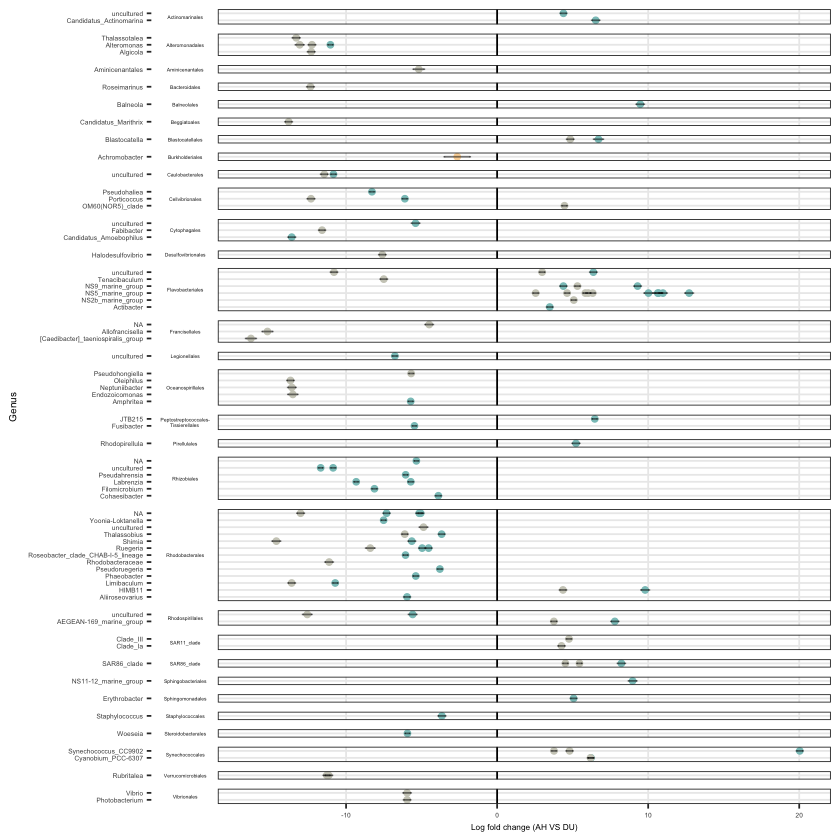

In [112]:
fig_sigs_DU = as.data.frame(bind_sigs_DU) %>%
filter(Order!="NA") %>%
#filter(tissue_typeDU > 1.5 | tissue_typeDU < -1.5) %>%
filter(Order!="NA") %>%
mutate_if(
                is.character, 
                stringr::str_replace_all, 
                pattern = "o__",
                replacement = "")  %>%

mutate_if(
                is.character, 
                stringr::str_replace_all, 
                pattern = "g__",
                replacement = "")  %>%
mutate_if(
                is.character, 
                stringr::str_replace_all, 
                pattern = "Peptostreptococcales-Tissierellales", 
                replacement = "Peptostreptococcales-\nTissierellales")  %>%

ggplot( 
           aes(tissue_typeDU, y = Genus)
              ) + 
geom_point(aes(color=Compartment)) +
   #geom_bar(stat = "identity", width = 1) +
           #, position = position_(width = 0.3)) +
  theme_bw() + 
 theme(legend.position = "none",
       panel.grid.minor.x = element_blank()) +
  
  
geom_errorbar(aes(xmin = tissue_typeDU - tissue_typeDUSD, xmax = tissue_typeDU + tissue_typeDUSD),
                width = 0.2,
                position = position_dodge(0.03), color = "black", alpha=0.5) + 
#scale_fill_manual(values=c("#40B5AD", "#6F8FAF")) +
  labs(x = "Log fold change (AH VS DU)", y = "Genus") + 
#theme(strip.background = element_rect(fill="white")) +
scale_color_manual(values=c(
 "ivory3", "#89C4C2",  "#F9D4A4"
)) +
theme(axis.title.x = element_text(size = 5)) +
theme(axis.title.y = element_text(size = 6)) +
#theme(axis.text.y = element_blank()) +
theme(axis.text.x = element_text(size =4)) +
theme(strip.text.y = element_text(size =4)) +
#theme(axis.text.y=element_blank()) +
theme(axis.text.y = element_text(size =4)) +
guides(color = guide_legend(keywidth = 0.2, , keyheight =.40, nrow=1)) +
#theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
theme(legend.text =element_text(size=6)) +
theme(legend.title = element_text(size=6)) +
facet_grid(Order~., space ="free", scales="free", switch="y") +
theme(strip.background = element_blank()) +
theme(strip.text.y.left = element_text(angle =0 )) +
theme(strip.text.y = element_text(size = 3)) +
geom_vline(xintercept = 0,  
                color = "black", size=.5)

fig_sigs_DU 
#ggsave("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/figs/ANCOM_com_DU.png",
 #      width = 6, height = 7, units = "in", dpi=250)

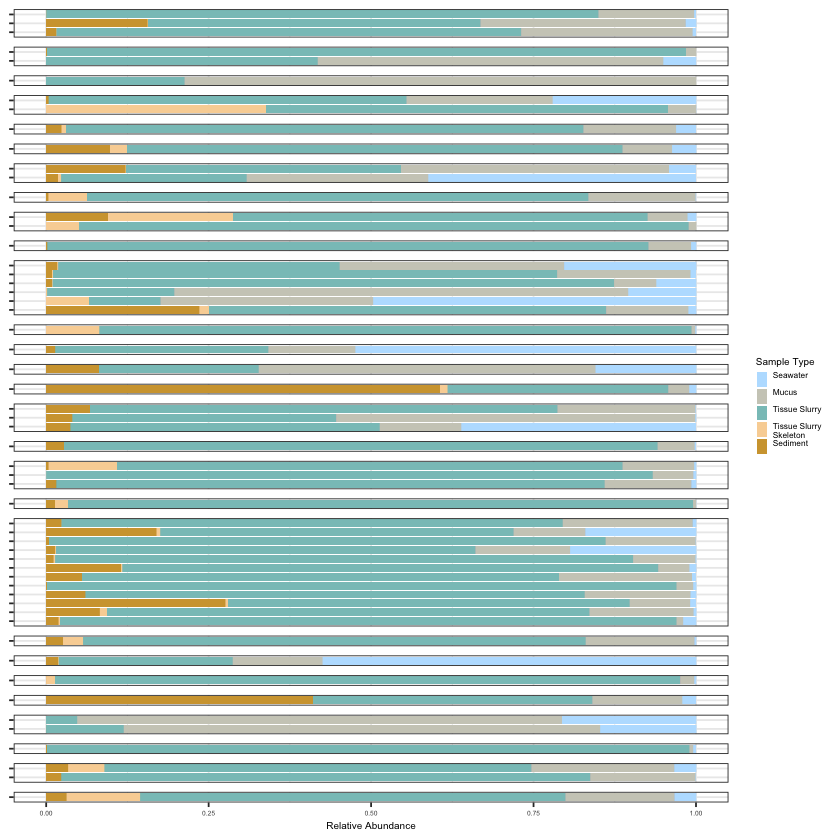

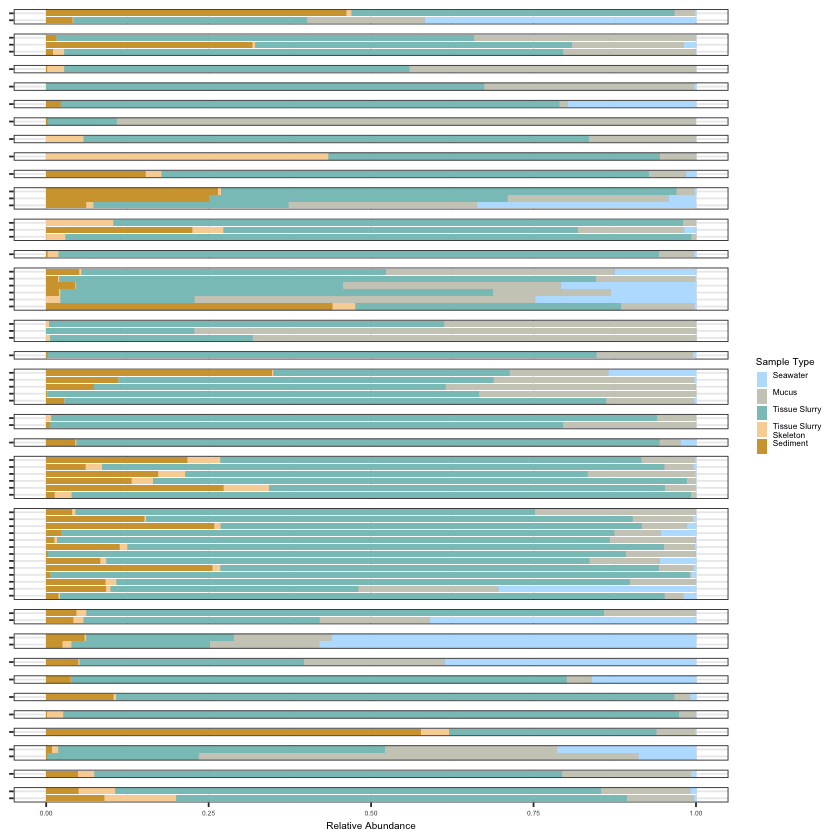

In [106]:
sigs_melt_DL$sample_type <- factor(sigs_melt_DL$sample_type, 
    levels = c("Seawater", "Mucus", "TissueSlurry", "TissueSlurry_Skeleton", "Sediment"))

type_ra_DL = sigs_melt_DL %>%
filter(Order!="NA") %>%
#filter(tissue_typeDL > 1.5 | tissue_typeDL < -1.5) %>%
filter(sample_type==sub_samples) %>%
mutate_if(
                is.character, 
                stringr::str_replace_all, 
                pattern = "o__", 
                replacement = "")  %>%
ggplot( 
           aes(x = Abundance, y = Genus, fill=sample_type)
              ) + 
 geom_bar(stat = "identity",position="fill") +
           #, position = position_(width = 0.3)) +
theme_bw() +
scale_fill_manual(values=c("#bae1ff","ivory3", "#89C4C2", "#F9D4A4" , "#D1A33D", "#bae1ff","ivory3", "#89C4C2"),
                 label=c(TissueSlurry_Skeleton= "Tissue Slurry\nSkeleton",
                        TissueSlurry="Tissue Slurry\n",
                        Sediment="Sediment\n",
                        Seawater="Seawater\n",
                        Mucus="Mucus\n")) +
  labs(y = "ASVs", x = "Relative Abundance") + 
theme(strip.background = element_rect(fill="white")) +
theme(axis.title.y = element_blank()) +
theme(axis.text.y = element_blank()) +
theme(axis.text.x = element_text(size =4)) +
theme(strip.text.y = element_blank()) +
guides(fill = guide_legend(keywidth = 0.8, keyheight =.70, ncol=1)) +
#theme(panel.border=element_blank(), axis.line=element_line()) +
facet_grid(Order~., space ="free", scales="free", switch = "y") +
theme(strip.background = element_blank()) +
 labs(fill = "Sample Type") +
guides(fill = guide_legend(keywidth = 0.5, , keyheight =.35, ncol=1)) +
theme(axis.title.x = element_text(size = 6)) +
theme(axis.title.y = element_blank()) +
theme(legend.text =element_text(size=5)) +
theme(legend.title = element_text(size=6)) 
#theme(legend.position="top") +
#theme(axis.text.x = element_text(angle = 0, hjust = 1)) 

#ggsave("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/figs/biome_DL.png",
 #       width = 5, height = 6.5, units = "in", dpi=250)

type_ra_DL

sigs_melt_DU$sample_type <- factor(sigs_melt_DU$sample_type, 
    levels = c("Seawater", "Mucus", "TissueSlurry", "TissueSlurry_Skeleton", "Sediment"))

type_ra_DU = sigs_melt_DU %>%
#filter(tissue_typeDU > 1.5 | tissue_typeDU < -1.5) %>%
filter(Order!="NA") %>%
filter(sample_type %in% sub_samples) %>%
mutate_if(
                is.character, 
                stringr::str_replace_all, 
                pattern = "o__", 
                replacement = "")  %>%
ggplot( 
           aes(x = Abundance, y = Genus, fill=sample_type)
              ) + 
 geom_bar(stat = "identity",position="fill") +
           #, position = position_(width = 0.3)) +
  theme_bw()  +
scale_fill_manual(values=c("#bae1ff","ivory3", "#89C4C2", "#F9D4A4" , "#D1A33D", "#bae1ff","ivory3", "#89C4C2"),
                 label=c(TissueSlurry_Skeleton= "Tissue Slurry\nSkeleton",
                        TissueSlurry="Tissue Slurry\n",
                        Sediment="Sediment\n",
                        Seawater="Seawater\n",
                        Mucus="Mucus\n")) +
  labs(y = "ASVs", x = "Relative Abundance") + 
theme(strip.background = element_rect(fill="white")) +
theme(axis.title.y = element_blank()) +
theme(axis.text.y = element_blank()) +
theme(axis.text.x = element_text(size =4)) +
theme(strip.text.y = element_blank()) +
guides(fill = guide_legend(keywidth = 0.8, keyheight =.70, ncol=1)) +
#theme(panel.border=element_blank(), axis.line=element_line()) +
facet_grid(Order~., space ="free", scales="free", switch = "y") +
theme(strip.background = element_blank()) +
 labs(fill = "Sample Type") +
guides(fill = guide_legend(keywidth = 0.5, , keyheight =.35, ncol=1)) +
theme(axis.title.x = element_text(size = 6)) +
theme(axis.title.y = element_blank()) +
theme(legend.text =element_text(size=5)) +
theme(legend.title = element_text(size=6)) 
#theme(legend.position="top") +
#theme(axis.text.x = element_text(angle = 50, hjust = 1)) 
type_ra_DU

#("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/figs/biome_DU.png",
 #       width = 5, height = 6, units = "in", dpi=250)

Warning message:
“Graphs cannot be vertically aligned unless the axis parameter is set. Placing graphs unaligned.”


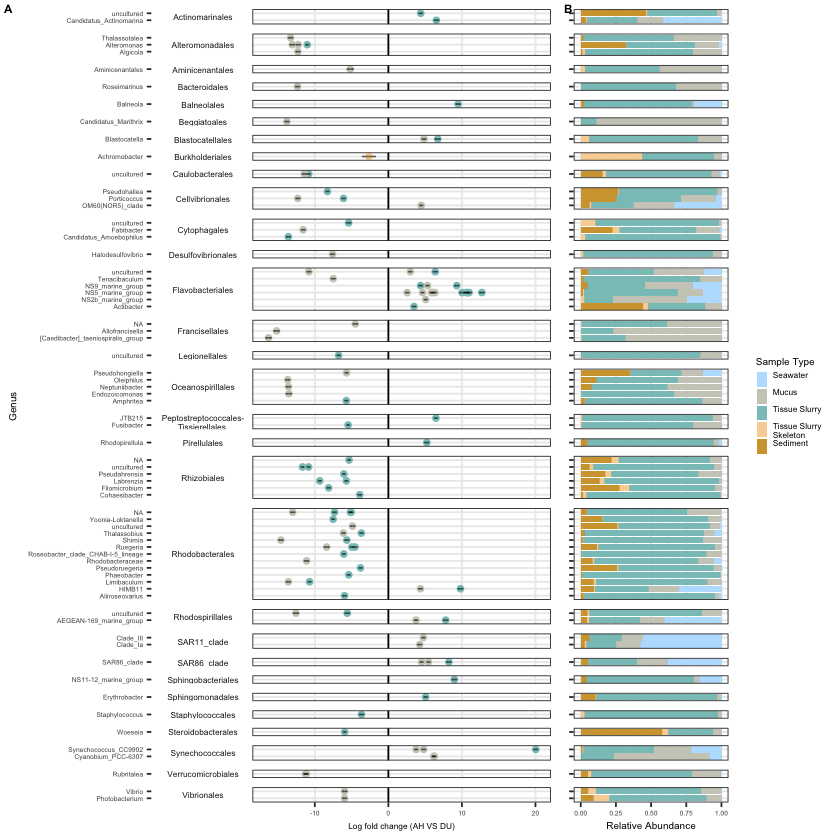

In [109]:
ggpubr::ggarrange(fig_sigs_DU,type_ra_DU, labels = c("A", "B"), nrow=1,
                  font.label = list(size = 7, color = "black"), widths = c(2, 1), align='hv')
ggsave("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/figs/ANCOM_DU_SIGRA.png",
     width = 5, height = 6, units = "in", dpi=300)

Warning message:
“Graphs cannot be vertically aligned unless the axis parameter is set. Placing graphs unaligned.”


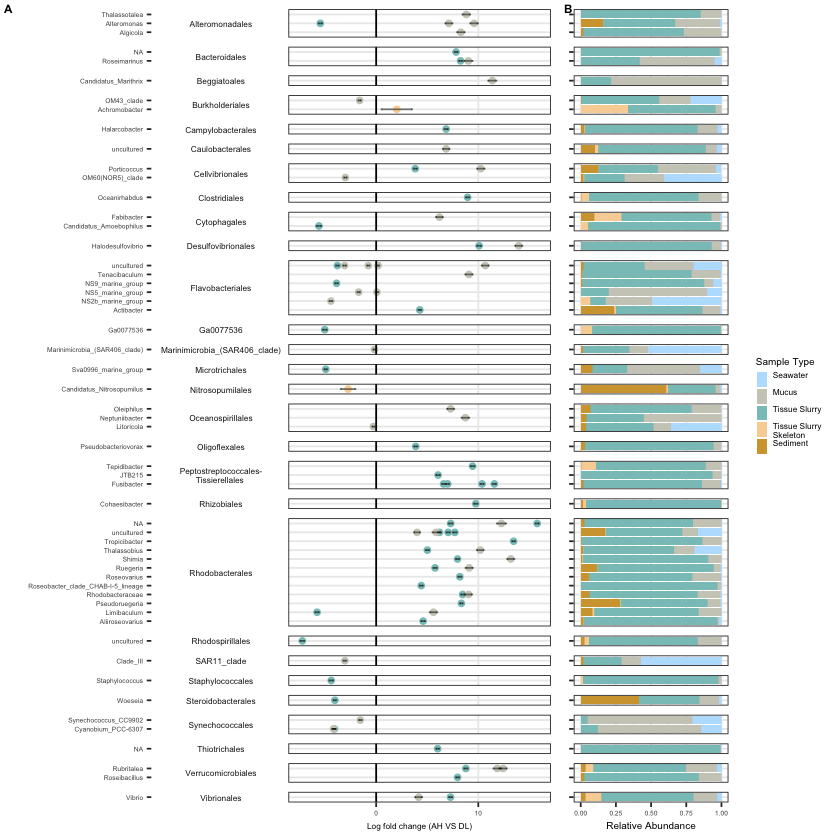

In [113]:
ggpubr::ggarrange(fig_sigs_DL,type_ra_DL, labels = c("A", "B"), nrow=1,
                  font.label = list(size = 7, color = "black"), widths = c(2, 1), align='hv')
ggsave("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/figs/ANCOM_DL_SIGRA.png",
     width = 5, height = 6, units = "in", dpi=300)

In [116]:
sigs_taxa_DL = tax_table(ps_merged_sigs) %>% as.data.frame() %>%
filter(as.numeric(tissue_typeDL)>=0)  %>%
as.matrix()


sigs_taxa_DU = tax_table(ps_merged_sigs_DU) %>% as.data.frame() %>%
filter(as.numeric(tissue_typeDU)>=0)  %>%
as.matrix()



ps_sigs_taxa_DL=phyloseq(otu_table(physeq_16S, taxa_are_rows= T),
tax_table(sigs_taxa_DL), sample_data(sample_info_tab_16S))
ps_sigs_taxa_DL

ps_sigs_taxa_DU=phyloseq(otu_table(physeq_16S, taxa_are_rows= T),
tax_table(sigs_taxa_DU), sample_data(sample_info_tab_16S))
ps_sigs_taxa_DU

sigs_taxa_DL = ps_sigs_taxa_DL %>%
microbiome::transform("compositional") %>%
psmelt()

sigs_taxa_DU = ps_sigs_taxa_DU %>%
microbiome::transform("compositional") %>%
psmelt()


phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 50 taxa and 2425 samples ]
sample_data() Sample Data:       [ 2425 samples by 68 sample variables ]
tax_table()   Taxonomy Table:    [ 50 taxa by 15 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 31 taxa and 2425 samples ]
sample_data() Sample Data:       [ 2425 samples by 68 sample variables ]
tax_table()   Taxonomy Table:    [ 31 taxa by 15 taxonomic ranks ]

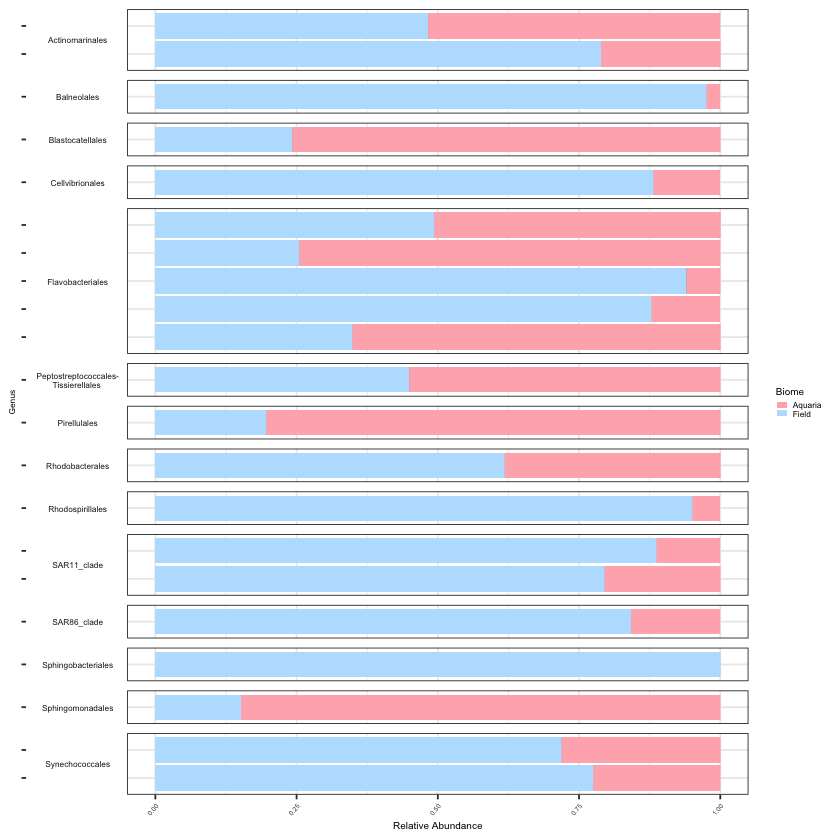

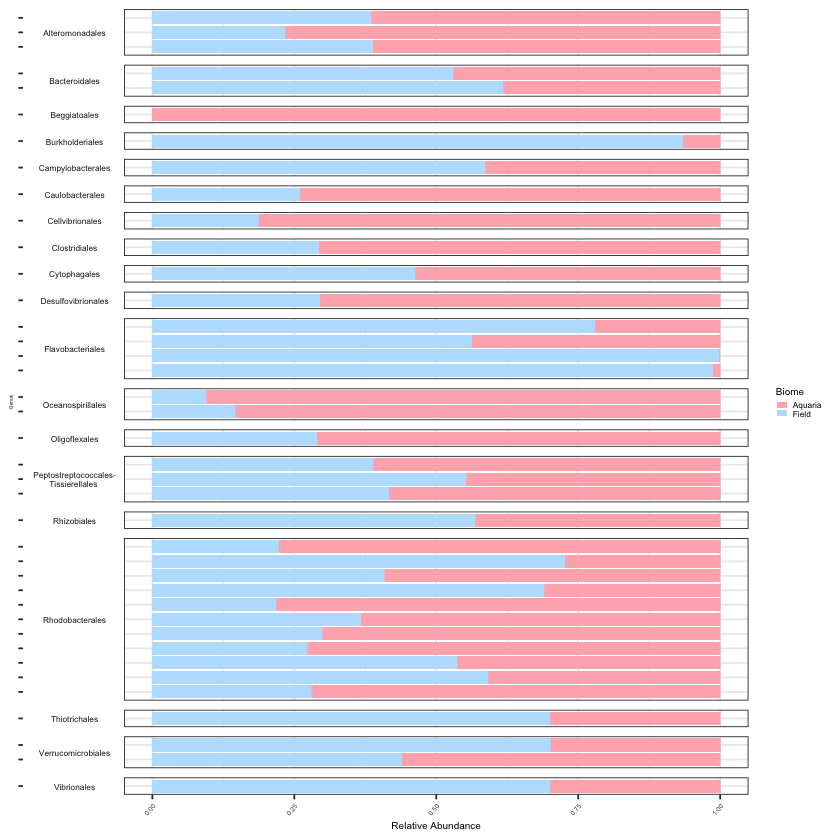

In [117]:
biome_ra_DU = sigs_taxa_DU  %>%
filter(Order!="NA") %>%
filter(sample_type==sub_samples) %>%
mutate_if(
                is.character, 
                stringr::str_replace_all, 
                pattern = "o__", 
                replacement = "")  %>%

mutate_if(
                is.character, 
                stringr::str_replace_all, 
                pattern = "Peptostreptococcales-Tissierellales", 
                replacement = "Peptostreptococcales-\nTissierellales")  %>%
ggplot(
           aes(x = Abundance, y = Genus, fill=Biome)
              ) + 
 geom_bar(stat = "identity",position="fill") +
           #, position = position_(width = 0.3)) +
  theme_bw()  +
  
scale_fill_manual(values=c("#ffb3ba", "#bae1ff","#7FA0B1", "#9CAF88", "7FA0B1")) +
  labs(y = "Genus", x = "Relative Abundance") + 
theme(strip.background = element_rect(fill="white")) +
guides(fill = guide_legend(keywidth = 0.5, , keyheight =.35, ncol=1)) +
theme(axis.title.x = element_text(size = 6)) +
theme(axis.title.y = element_text(size = 5)) +
theme(axis.text.y = element_text(size =4)) +
theme(axis.text.y = element_blank()) +
#theme(panel.border=element_blank(), axis.line=element_line()) +
facet_grid(Order~., space ="free", scales="free", switch = "y") +
theme(strip.background = element_blank()) +
theme(strip.text.y.left = element_text(angle =0 )) +
theme(strip.text.y = element_text(size = 5)) +
theme(legend.text =element_text(size=5)) +
theme(legend.title = element_text(size=6)) +
#theme(legend.position="top") +
theme(axis.text.x = element_text(size =4)) +
theme(axis.text.x = element_text(angle = 50, hjust = 1)) 

biome_ra_DU

#ggsave("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/figs/sampleType_DU.png",
 #       width = 5, height = 6.5, units = "in", dpi=250)


biome_ra_DL = sigs_taxa_DL %>%
filter(Order!="NA") %>%
filter(sample_type==sub_samples) %>%
mutate_if(
                is.character, 
                stringr::str_replace_all, 
                pattern = "o__", 
                replacement = "")  %>%
mutate_if(
                is.character, 
                stringr::str_replace_all, 
                pattern = "Peptostreptococcales-Tissierellales", 
                replacement = "Peptostreptococcales-\nTissierellales")  %>%
mutate_if(
                is.character, 
                stringr::str_replace_all, 
                pattern = "Marinimicrobia_(SAR406_clade)", 
                replacement = "Marinimicrobia\n(SAR406_clade)")  %>%



ggplot(
           aes(x = Abundance, y = Genus, fill=Biome)
              ) + 
 geom_bar(stat = "identity",position="fill") +
           #, position = position_(width = 0.3)) +
  theme_bw()  +
  
scale_fill_manual(values=c("#ffb3ba", "#bae1ff","#7FA0B1", "#9CAF88", "7FA0B1")) +
  labs(y = "Genus", x = "Relative Abundance") + 
theme(strip.background = element_rect(fill="white")) +
guides(fill = guide_legend(keywidth = 0.5, , keyheight =.35, ncol=1)) +
theme(axis.title.x = element_text(size = 6)) +
theme(axis.title.y = element_text(size = 3)) +
theme(axis.text.y = element_text(size =3)) +
theme(axis.text.y = element_blank()) +
#theme(panel.border=element_blank(), axis.line=element_line()) +
facet_grid(Order~., space ="free", scales="free", switch = "y") +
theme(strip.background = element_blank()) +
theme(strip.text.y.left = element_text(angle =0 )) +
theme(strip.text.y = element_text(size = 5)) +
theme(legend.text =element_text(size=5)) +
theme(legend.title = element_text(size=6)) +
#theme(legend.position="top") +
theme(axis.text.x = element_text(size =4)) +
theme(axis.text.x = element_text(angle = 50, hjust = 1)) 

biome_ra_DL

#ggsave("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/figs/sampleType_DL.png",
      #  width = 5, height = 6, units = "in", dpi=250)







Warning message in `==.default`(sample_type, sub_samples2):
“longer object length is not a multiple of shorter object length”
Warning message in is.na(e1) | is.na(e2):
“longer object length is not a multiple of shorter object length”
Warning message in `==.default`(sample_type, sub_samples2):
“longer object length is not a multiple of shorter object length”
Warning message in is.na(e1) | is.na(e2):
“longer object length is not a multiple of shorter object length”


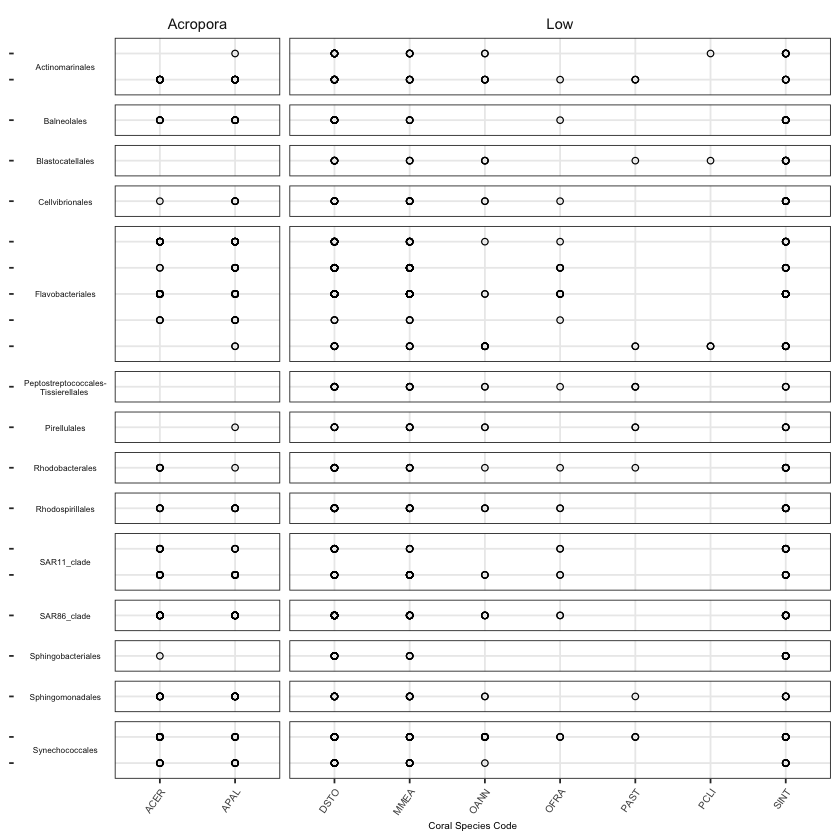

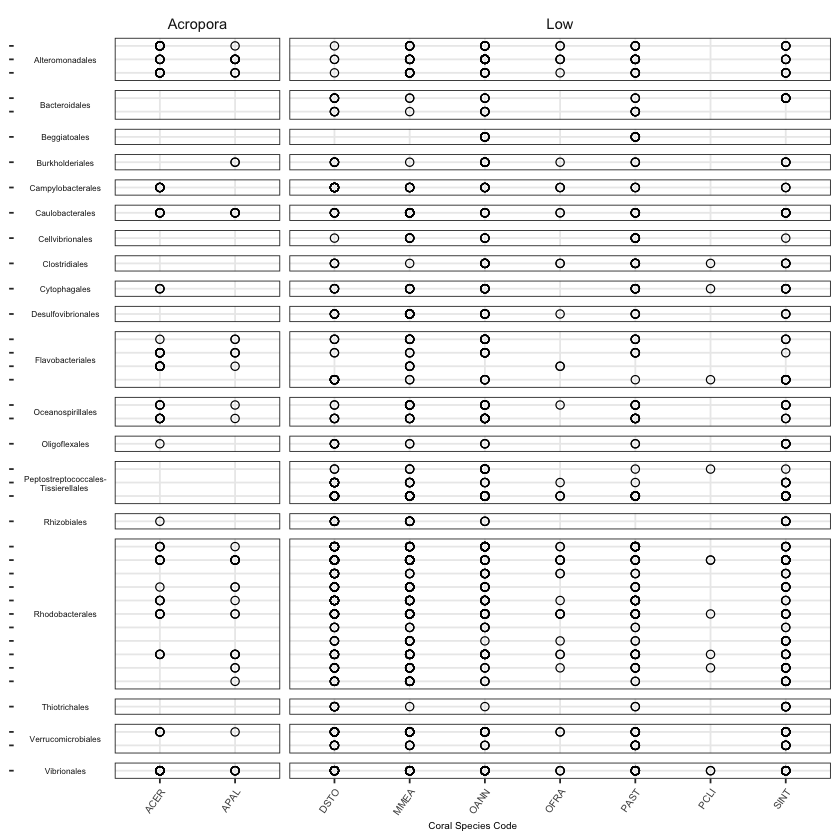

In [147]:
species_PA_DU = sigs_taxa_DU %>%
filter(Order!="NA") %>%
filter(Abundance >0) %>%
filter(Species_counts!="High") %>%
filter(sample_type==sub_samples2) %>%
mutate_if(
                is.character, 
                stringr::str_replace_all, 
                pattern = "o__", 
                replacement = "")  %>%
mutate_if(
                is.character, 
                stringr::str_replace_all, 
                pattern = "Peptostreptococcales-Tissierellales", 
                replacement = "Peptostreptococcales-\nTissierellales")  %>%
ggplot(
           aes(x = species_code, y = Genus)
              ) + 
# geom_bar(stat = "identity",position="fill") +
           #, position = position_(width = 0.3)) +
 
geom_point(pch=21, colour="black", size=1.5) +
  theme_bw()  +

  
scale_fill_manual(values=c("#bae1ff", "#957DAD", "lightsalmon",  
                           
                           "#F9D4A4", 
                            "#89C4C2",
                        
                           "gray80", 
                           "#D1A33D",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588","yellow2","#5F7FC7", "orange","#DA5724",
                            "gray80",
                           "#AD6F3B", "#673770")) +
labs(y = "ASVs", x = "Coral Species Code") + 
theme(strip.background = element_rect(fill="white")) +
theme(axis.title.x = element_text(size = 6)) +
theme(axis.title.y = element_blank()) +
theme(axis.text.y = element_text(size =5)) +
theme(axis.text.x = element_text(size =6)) +
#theme(axis.text.x=element_blank()) +
theme(axis.text.y=element_blank()) +
guides(fill = guide_legend(keywidth = 0.5, keyheight =.35, ncol=1)) +
#theme(panel.border=element_blank(), axis.line=element_line()) +
facet_grid(Order~Species_counts, space ="free", scales="free", switch = "y") +
theme(strip.background = element_blank()) +
theme(strip.text.y.left = element_text(angle =0 )) +
theme(strip.text.y = element_blank()) +
theme(strip.text.y = element_text(size = 5)) +
#theme(strip.text.x = element_blank()) +
theme(axis.text.x = element_text(angle = 55,hjust = 1)) +
  theme(legend.position = "none",
       panel.grid.minor.x = element_blank()) 
species_PA_DU
#ggsave("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/figs/speciesCode_DU.png",
 #       width = 7, height = 6.5, units = "in", dpi=250)


species_PA_DL= sigs_taxa_DL %>%
filter(Order!="NA") %>%
filter(Abundance >0) %>%
filter(Species_counts!="High") %>%
filter(sample_type==sub_samples2) %>%
mutate_if(
                is.character, 
                stringr::str_replace_all, 
                pattern = "o__", 
                replacement = "")  %>%
mutate_if(
                is.character, 
                stringr::str_replace_all, 
                pattern = "Peptostreptococcales-Tissierellales", 
                replacement = "Peptostreptococcales-\nTissierellales")  %>%
mutate_if(
                is.character, 
                stringr::str_replace_all, 
                pattern = "Marinimicrobia_(SAR406_clade)", 
                replacement = "Marinimicrobia\n(SAR406_clade)")  %>%

ggplot(
           aes(x = species_code, y = Genus)
              ) + 
# geom_bar(stat = "identity",position="fill") +
           #, position = position_(width = 0.3)) +
 
geom_point(pch=21, colour="black", size=2) +
  theme_bw()  +

  
scale_fill_manual(values=c("#bae1ff", "#957DAD", "lightsalmon",  
                           
                           "#F9D4A4", 
                            "#89C4C2",
                        
                           "gray80", 
                           "#D1A33D",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588","yellow2","#5F7FC7", "orange","#DA5724",
                            "gray80",
                           "#AD6F3B", "#673770")) +
labs(y = "ASVs", x = "Coral Species Code") + 
theme(strip.background = element_rect(fill="white")) +
theme(axis.title.x = element_text(size = 6)) +
theme(axis.title.y = element_blank()) +
theme(axis.text.y = element_text(size =5)) +
theme(axis.text.x = element_text(size =6)) +
#theme(axis.text.x=element_blank()) +
theme(axis.text.y=element_blank()) +
guides(fill = guide_legend(keywidth = 0.5, keyheight =.35, ncol=1)) +
#theme(panel.border=element_blank(), axis.line=element_line()) +
facet_grid(Order~Species_counts, space ="free", scales="free", switch = "y") +
theme(strip.background = element_blank()) +
theme(strip.text.y.left = element_text(angle =0 )) +
theme(strip.text.y = element_blank()) +
#theme(strip.text.x = element_blank()) +
theme(strip.text.y = element_text(size = 5)) +
theme(axis.text.x = element_text(angle = 55, hjust = 1)) +
  theme(legend.position = "none",
       panel.grid.minor.x = element_blank()) 
#theme(strip.text.x = element_text(size=4)) 

species_PA_DL

#ggsave("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/figs/speciesCode_DL.png",
 #       width = 7, height = 6, units = "in", dpi=250)

Warning message in `==.default`(sample_type, sub_samples):
“longer object length is not a multiple of shorter object length”
Warning message in is.na(e1) | is.na(e2):
“longer object length is not a multiple of shorter object length”
Warning message in `==.default`(sample_type, sub_samples):
“longer object length is not a multiple of shorter object length”
Warning message in is.na(e1) | is.na(e2):
“longer object length is not a multiple of shorter object length”


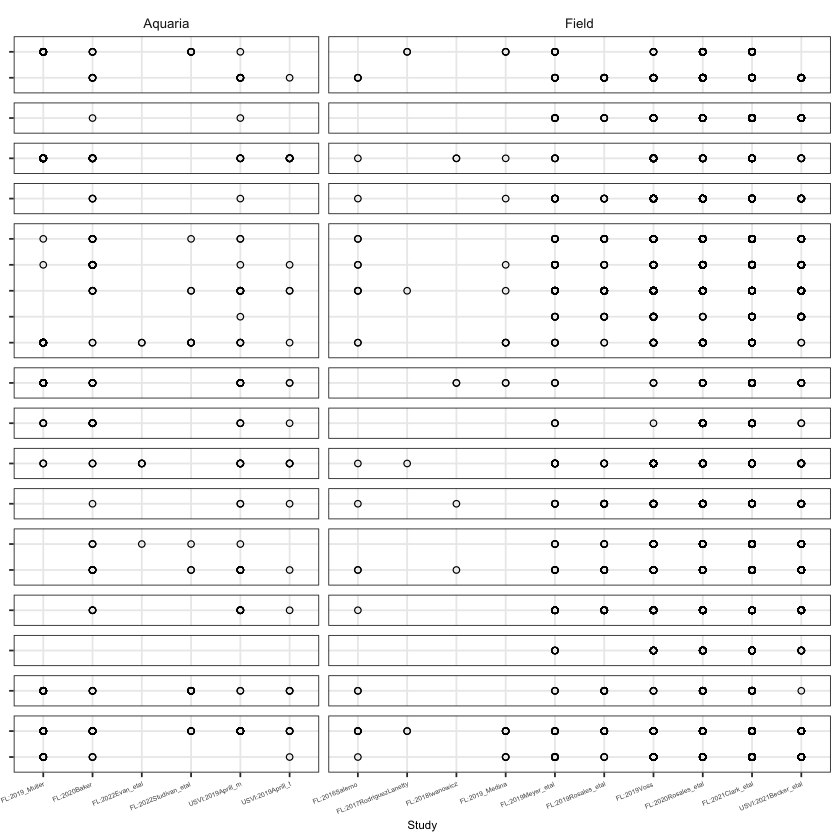

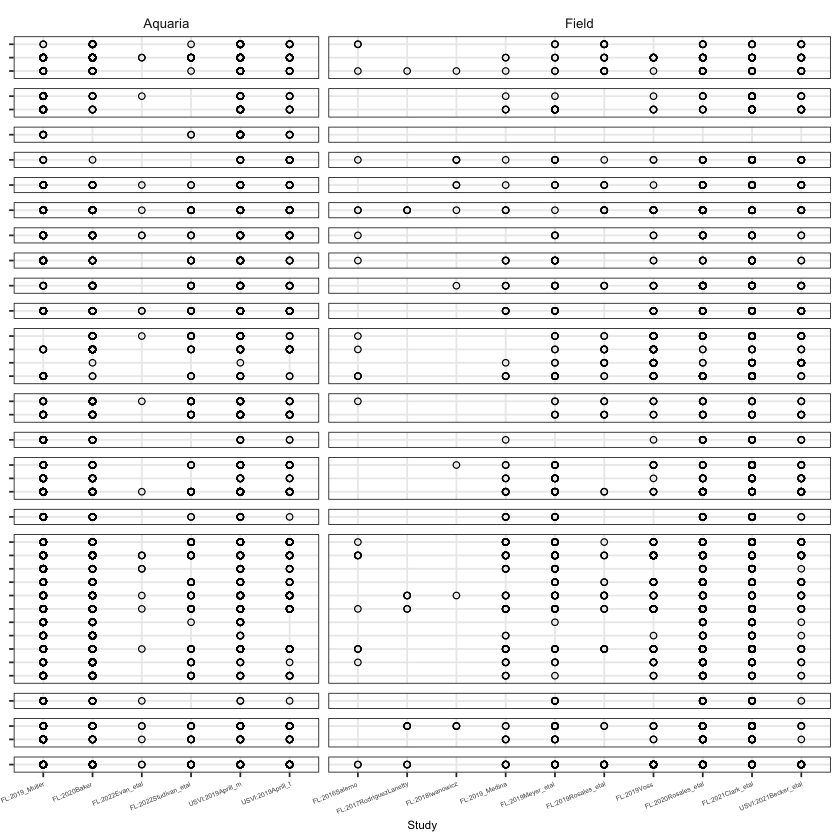

In [134]:
study_PA_DU= sigs_taxa_DU %>%
filter(Order!="NA") %>%
filter(Abundance >0) %>%
filter(sample_type==sub_samples) %>%

ggplot(
           aes(x = Study, y = Genus)
              ) + 
# geom_bar(stat = "identity",position="fill") +
           #, position = position_(width = 0.3)) +
 
geom_point(pch=21, colour="black") +
  theme_bw()  +

  
scale_fill_manual(values=c("#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD",
                           "gray80", "#AD6F3B", "#673770","#006700","#8569D5", 
                           "#5E738F","#D1A33D", "#8A7C64","lightsalmon","aquamarine4", "#652926",
                           "lightblue4", "lightpink","royalblue4","#D14285",
                           "palevioletred1", "#ffb3ba", "#bae1ff", "#957DAD", "lightsalmon",  
                           
                           "#F9D4A4", 
                            "#89C4C2",
                        
                           "gray80", 
                           "#D1A33D",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588","yellow2","#5F7FC7", "orange","#DA5724",
                            "gray80",
                           "#AD6F3B", "#673770")) +
labs(y = "ASVs", x = "Study") + 
theme(strip.background = element_rect(fill="white")) +
theme(axis.title.x = element_text(size = 7)) +
theme(axis.title.y = element_blank()) +
#theme(axis.text.y = element_text(size =5)) +
theme(axis.text.x = element_text(size =4)) +
#theme(axis.text.x=element_blank()) +
theme(axis.text.y=element_blank()) +
guides(fill = guide_legend(keywidth = 0.5, keyheight =.35, ncol=1)) +
#theme(panel.border=element_blank(), axis.line=element_line()) +
facet_grid(Order~Biome, space ="free", scales="free", switch = "y") +
theme(strip.background = element_blank()) +
#theme(strip.text.y.left = element_text(angle =0 )) +
theme(strip.text.y = element_blank()) +
#theme(strip.text.x = element_blank()) +
theme(axis.text.x = element_text(angle = 22, hjust = 1)) +
  theme(legend.position = "none",
       panel.grid.minor.x = element_blank()) +
theme(strip.text.x = element_text(size=8)) 

study_PA_DU






study_PA_DL= sigs_taxa_DL %>%
filter(Order!="NA") %>%
filter(Abundance >0) %>%
filter(sample_type==sub_samples) %>%

ggplot(
           aes(x = Study, y = Genus)
              ) + 
# geom_bar(stat = "identity",position="fill") +
           #, position = position_(width = 0.3)) +
 
geom_point(pch=21, colour="black") +
  theme_bw()  +

  
scale_fill_manual(values=c("#56B4E9","#CBD588","#5F7FC7", "orange","#DA5724","#CD9BCD",
                           "gray80", "#AD6F3B", "#673770","#006700","#8569D5", 
                           "#5E738F","#D1A33D", "#8A7C64","lightsalmon","aquamarine4", "#652926",
                           "lightblue4", "lightpink","royalblue4","#D14285",
                           "palevioletred1", "#ffb3ba", "#bae1ff", "#957DAD", "lightsalmon",  
                           
                           "#F9D4A4", 
                            "#89C4C2",
                        
                           "gray80", 
                           "#D1A33D",
                           "lightblue4", "lightpink", "ivory4","royalblue4", "darkorchid", 
                           "palevioletred1", "#56B4E9","#CBD588","yellow2","#5F7FC7", "orange","#DA5724",
                            "gray80",
                           "#AD6F3B", "#673770")) +
labs(y = "ASVs", x = "Study") + 
theme(strip.background = element_rect(fill="white")) +
theme(axis.title.x = element_text(size = 7)) +
theme(axis.title.y = element_blank()) +
#theme(axis.text.y = element_text(size =5)) +
theme(axis.text.x = element_text(size =4)) +
#theme(axis.text.x=element_blank()) +
theme(axis.text.y=element_blank()) +
guides(fill = guide_legend(keywidth = 0.5, keyheight =.35, ncol=1)) +
#theme(panel.border=element_blank(), axis.line=element_line()) +
facet_grid(Order~Biome, space ="free", scales="free", switch = "y") +
theme(strip.background = element_blank()) +
#theme(strip.text.y.left = element_text(angle =0 )) +
theme(strip.text.y = element_blank()) +
#theme(strip.text.x = element_blank()) +
theme(axis.text.x = element_text(angle = 22, hjust = 1)) +
  theme(legend.position = "none",
       panel.grid.minor.x = element_blank()) +
theme(strip.text.x = element_text(size=8)) 

study_PA_DL

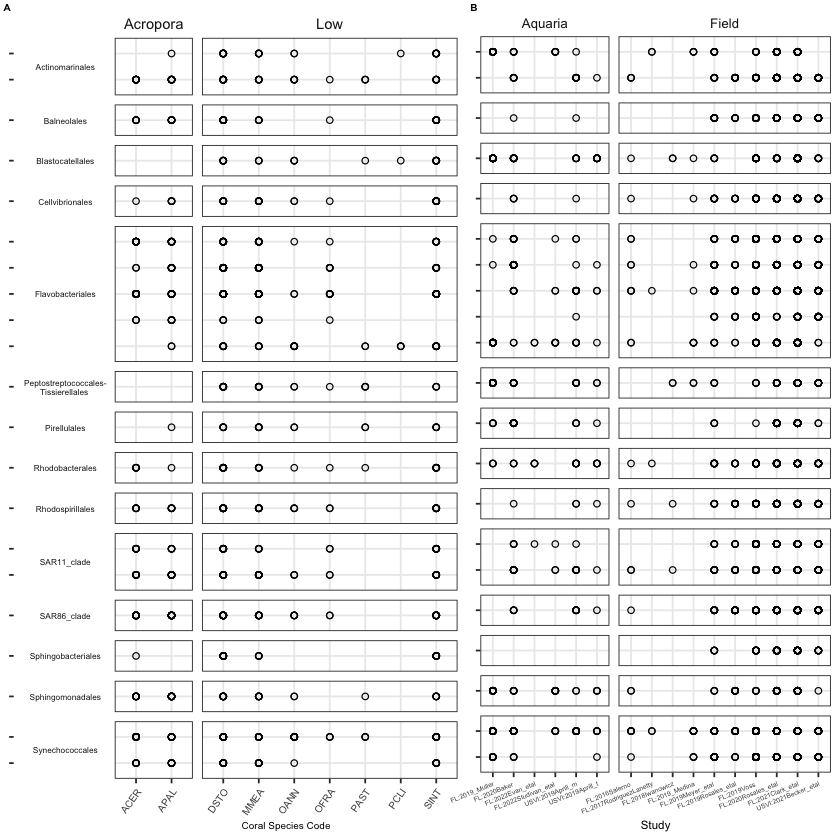

In [148]:
ggpubr::ggarrange(species_PA_DU, study_PA_DU, labels = c("A", "B", "C"), nrow=1,
                  font.label = list(size = 6, color = "black"), widths = c(1.5, 1.2,1))
ggsave("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/figs/ANCOM_DU_RA.png",
     width = 6, height = 6, units = "in", dpi=300)

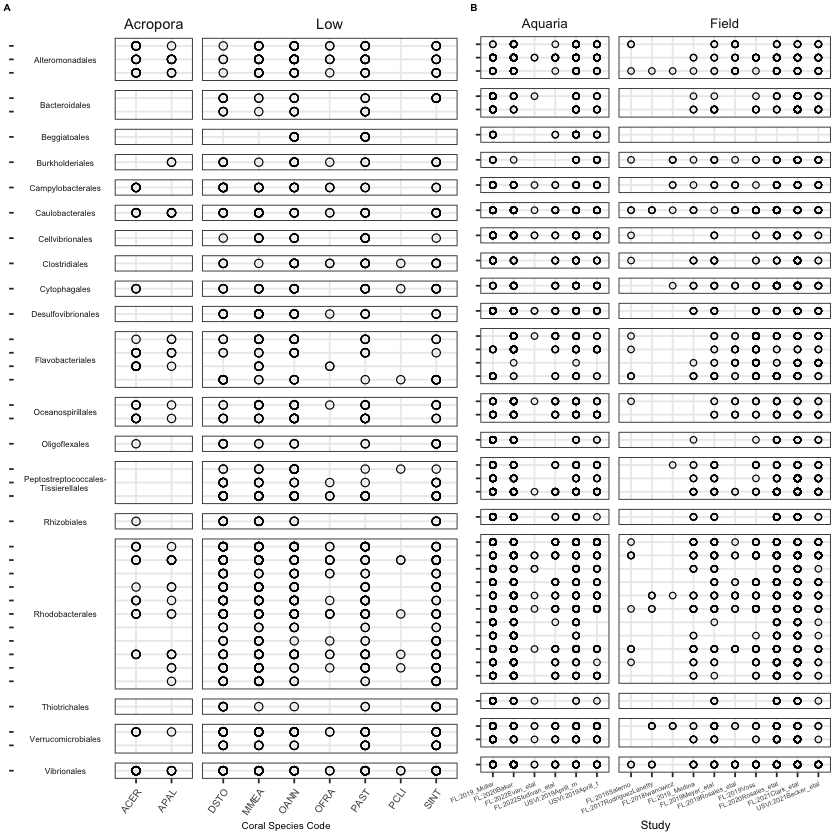

In [149]:
ggpubr::ggarrange(species_PA_DL, study_PA_DL, labels = c("A", "B", "C"), nrow=1,
                  font.label = list(size = 6, color = "black"), widths = c(1.5, 1.2,1))
ggsave("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/figs/ANCOM_DL_RA.png",
     width = 6, height = 6, units = "in", dpi=300)

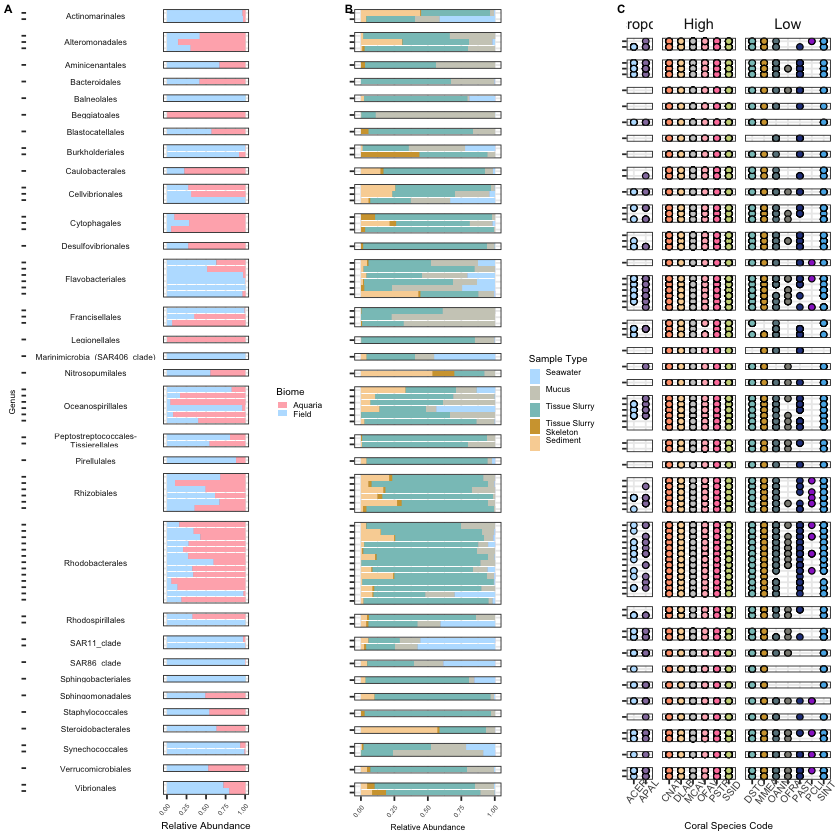

In [156]:
ggpubr::ggarrange(biome_ra_DU,type_ra_DU, species_PA_DU, labels = c("A", "B", "C"), nrow=1,
                  font.label = list(size = 7, color = "black"), widths = c(1.5, 1.2,1))
ggsave("/Users/stephanie.rosales/Documents/Tissueloss/SCTLD_MetaAnalysis/figs/ANCOM_DU_RA.png",
     width = 6, height = 7, units = "in", dpi=300)

In [160]:
library(data.table)
#run function to summarize relative abundance 
fast_melt = function(physeq){
  # supports "naked" otu_table as `physeq` input.
  otutab = as(otu_table(physeq), "matrix")
  if(!taxa_are_rows(physeq)){otutab <- t(otutab)}
  otudt = data.table(otutab, keep.rownames = TRUE)
  setnames(otudt, "rn", "taxaID")
  # Enforce character taxaID key
  otudt[, taxaIDchar := as.character(taxaID)]
  otudt[, taxaID := NULL]
  setnames(otudt, "taxaIDchar", "taxaID")
  # Melt count table
  mdt = melt.data.table(otudt, 
                        id.vars = "taxaID",
                        variable.name = "SampleID",
                        value.name = "count")
  # Remove zeroes, NAs
  mdt <- mdt[count > 0][!is.na(count)]
  # Calculate relative abundance
  mdt[, RelativeAbundance := count / sum(count), by = SampleID]
  if(!is.null(tax_table(physeq, errorIfNULL = FALSE))){
    # If there is a tax_table, join with it. Otherwise, skip this join.
    taxdt = data.table(as(tax_table(physeq, errorIfNULL = TRUE), "matrix"), keep.rownames = TRUE)
    setnames(taxdt, "rn", "taxaID")
    # Enforce character taxaID key
    taxdt[, taxaIDchar := as.character(taxaID)]
    taxdt[, taxaID := NULL]
    setnames(taxdt, "taxaIDchar", "taxaID")
    # Join with tax table
    setkey(taxdt, "taxaID")
    setkey(mdt, "taxaID")
    mdt <- taxdt[mdt]
  }
  return(mdt)
}

summarize_taxa = function(physeq, Rank, GroupBy = NULL){
  Rank <- Rank[1]
  if(!Rank %in% rank_names(physeq)){
    message("The argument to `Rank` was:\n", Rank,
            "\nBut it was not found among taxonomic ranks:\n",
            paste0(rank_names(physeq), collapse = ", "), "\n",
            "Please check the list shown above and try again.")
  }
  if(!is.null(GroupBy)){
    GroupBy <- GroupBy[1]
    if(!GroupBy %in% sample_variables(physeq)){
      message("The argument to `GroupBy` was:\n", GroupBy,
              "\nBut it was not found among sample variables:\n",
              paste0(sample_variables(physeq), collapse = ", "), "\n",
              "Please check the list shown above and try again.")
    }
  }
  # Start with fast melt
  mdt = fast_melt(physeq)
  if(!is.null(GroupBy)){
    # Add the variable indicated in `GroupBy`, if provided.
    sdt = data.table(SampleID = sample_names(physeq),
                     var1 = get_variable(physeq, GroupBy))
    setnames(sdt, "var1", GroupBy)
    # Join
    setkey(sdt, SampleID)
    setkey(mdt, SampleID)
    mdt <- sdt[mdt]
  }
  # Summarize
Nsamples = nsamples(physeq)
  summarydt = mdt[, list(meanRA = (sum(RelativeAbundance)/Nsamples)*100,
                         sdRA = sd(RelativeAbundance)*100,
                         minRA = min(RelativeAbundance)*100,
                         maxRA = max(RelativeAbundance)*100),
                  by = c(Rank, GroupBy)]
  return(summarydt)
}


In [161]:
sigs_taxa_DL = tax_table(ps_merged_sigs) %>% as.data.frame() %>%
filter(as.numeric(tissue_typeDL)>=0)  %>%
as.matrix()
sigs_taxa_DL 

sigs_taxa_DU = tax_table(ps_merged_sigs_DU) %>% as.data.frame() %>%
filter(as.numeric(tissue_typeDU)>=0)  %>%
as.matrix()
sigs_taxa_DU

,tissue_typeDL,tissue_typeDLSD,group,Kingdom,Phylum,Class,Order,Taxa,Family,Genus,Species,Consensus,ASVs,Sig,Compartment
b12f1ebb5d05e1c88a9f265adb80fc55,9.749459,0.1779336,DL,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhizobiales,o__Rhizobiales_ f__Rhizobiaceae_ g__Cohaesibacter,f__Rhizobiaceae,g__Cohaesibacter,s__uncultured_bacterium,0.6666667,ASV_101999,TRUE,Tissue Slurry
7df259fe05818b722e6f40845a657dc8,4.597978,0.1912251,DL,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,o__Rhodobacterales_ f__Rhodobacteraceae_ g__Aliiroseovarius,f__Rhodobacteraceae,g__Aliiroseovarius,NA,0.6666667,ASV_72448,TRUE,Tissue Slurry
c6b98c58f5a8f184cc1b130f66f944ab,6.605426,0.1709424,DL,d__Bacteria,p__Firmicutes,c__Clostridia,o__Peptostreptococcales-Tissierellales,o__Peptostreptococcales-Tissierellales_ f__Fusibacteraceae_ g__Fusibacter,f__Fusibacteraceae,g__Fusibacter,NA,0.7500000,ASV_114300,TRUE,Tissue Slurry
0583e9fb260de4b316e4074bbe4d8870,7.295088,0.1955000,DL,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,o__Rhodobacterales_ f__Rhodobacteraceae_NA,f__Rhodobacteraceae,NA,NA,1.0000000,ASV_3285,TRUE,Tissue Slurry
1696d7941bdae3ff494f13fc3f318a57,10.081449,0.2072436,DL,d__Bacteria,p__Desulfobacterota,c__Desulfovibrionia,o__Desulfovibrionales,o__Desulfovibrionales_ f__Desulfovibrionaceae_ g__Halodesulfovibrio,f__Desulfovibrionaceae,g__Halodesulfovibrio,s__Halodesulfovibrio_aestuarii,0.6666667,ASV_13041,TRUE,Tissue Slurry
f0bde56752e14fbc1bbfc4a268625629,3.873695,0.1607968,DL,d__Bacteria,p__Bdellovibrionota,c__Oligoflexia,o__Oligoflexales,o__Oligoflexales_ f__Oligoflexales_ g__Pseudobacteriovorax,f__Oligoflexales,g__Pseudobacteriovorax,s__uncultured_delta,0.6666667,ASV_138492,TRUE,Tissue Slurry
429264bc3cd49d9c544f286870123eaa,6.853699,0.1660693,DL,d__Bacteria,p__Campilobacterota,c__Campylobacteria,o__Campylobacterales,o__Campylobacterales_ f__Arcobacteraceae_ g__Halarcobacter,f__Arcobacteraceae,g__Halarcobacter,s__uncultured_bacterium,0.6666667,ASV_38201,TRUE,Tissue Slurry
5ccf756aaef284913d9eb9762dc81693,8.783035,0.1689900,DL,d__Bacteria,p__Verrucomicrobiota,c__Verrucomicrobiae,o__Verrucomicrobiales,o__Verrucomicrobiales_ f__Rubritaleaceae_ g__Rubritalea,f__Rubritaleaceae,g__Rubritalea,NA,1.0000000,ASV_53282,TRUE,Tissue Slurry
e7cb2ee39636890081f5bfd5ce1a7be7,8.957692,0.1726893,DL,d__Bacteria,p__Firmicutes,c__Clostridia,o__Clostridiales,o__Clostridiales_ f__Clostridiaceae_ g__Oceanirhabdus,f__Clostridiaceae,g__Oceanirhabdus,s__uncultured_bacterium,0.6666667,ASV_133434,TRUE,Tissue Slurry
07be68b1341287b925b9a1688d7569f6,15.769552,0.1715821,DL,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,o__Rhodobacterales_ f__Rhodobacteraceae_NA,f__Rhodobacteraceae,NA,NA,1.0000000,ASV_4523,TRUE,Tissue Slurry


,tissue_typeDU,tissue_typeDUSD,group,Kingdom,Phylum,Class,Order,Taxa,Family,Genus,Species,Consensus,ASVs,Sig,Compartment
5ea4e6d172010676d104e0d06b74eb20,9.798776,0.2792627,DU,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodobacterales,o__Rhodobacterales_ f__Rhodobacteraceae_ g__HIMB11,f__Rhodobacteraceae,g__HIMB11,s__uncultured_bacterium,0.6666667,ASV_54295,TRUE,Tissue Slurry
df84a5521a71e034423dee45569b5796,10.977204,0.2797266,DU,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Flavobacteriales,o__Flavobacteriales_ f__Flavobacteriaceae_ g__NS5_marine_group,f__Flavobacteriaceae,g__NS5_marine_group,s__uncultured_Flavobacteriaceae,0.6666667,ASV_128647,TRUE,Tissue Slurry
28afe7cd79565036893f3423a0552f6d,6.213774,0.1889416,DU,d__Bacteria,p__Cyanobacteria,c__Cyanobacteriia,o__Synechococcales,o__Synechococcales_ f__Cyanobiaceae_ g__Cyanobium_PCC-6307,f__Cyanobiaceae,g__Cyanobium_PCC-6307,s__uncultured_bacterium,0.6666667,ASV_23589,TRUE,Tissue Slurry
bcb850209fde2b286a1b06dc0f150b61,9.299773,0.2393730,DU,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Flavobacteriales,o__Flavobacteriales_ f__NS9_marine_group_ g__NS9_marine_group,f__NS9_marine_group,g__NS9_marine_group,s__uncultured_bacterium,1.0000000,ASV_108701,TRUE,Tissue Slurry
9dc38cb404650eca0349227ef20697d1,6.370965,0.2371939,DU,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Flavobacteriales,o__Flavobacteriales_ f__Cryomorphaceae_ g__uncultured,f__Cryomorphaceae,g__uncultured,s__uncultured_bacterium,1.0000000,ASV_90872,TRUE,Tissue Slurry
83cebf00aca1b32cb3aa9d066dcd9008,12.712294,0.2795857,DU,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Flavobacteriales,o__Flavobacteriales_ f__Flavobacteriaceae_ g__NS5_marine_group,f__Flavobacteriaceae,g__NS5_marine_group,s__uncultured_Flavobacterium,0.6666667,ASV_75801,TRUE,Tissue Slurry
c4f831a08022abf1553794c399bfd64e,9.474800,0.2656240,DU,d__Bacteria,p__Bacteroidota,c__Rhodothermia,o__Balneolales,o__Balneolales_ f__Balneolaceae_ g__Balneola,f__Balneolaceae,g__Balneola,s__uncultured_bacterium,0.6666667,ASV_113297,TRUE,Tissue Slurry
a7ebf4d54d01071ce1546c207c0e6eb6,10.692995,0.2546810,DU,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Flavobacteriales,o__Flavobacteriales_ f__Flavobacteriaceae_ g__NS5_marine_group,f__Flavobacteriaceae,g__NS5_marine_group,s__uncultured_bacterium,0.6666667,ASV_96767,TRUE,Tissue Slurry
9b6371d1a62a89775038ef84b64b5d94,4.385092,0.2278579,DU,d__Bacteria,p__Bacteroidota,c__Bacteroidia,o__Flavobacteriales,o__Flavobacteriales_ f__NS9_marine_group_ g__NS9_marine_group,f__NS9_marine_group,g__NS9_marine_group,s__uncultured_bacterium,1.0000000,ASV_89526,TRUE,Tissue Slurry
cd8d8260ff21fcaf097dfe1fa7df833d,7.791570,0.2581294,DU,d__Bacteria,p__Proteobacteria,c__Alphaproteobacteria,o__Rhodospirillales,o__Rhodospirillales_ f__AEGEAN-169_marine_group_ g__AEGEAN-169_marine_group,f__AEGEAN-169_marine_group,g__AEGEAN-169_marine_group,s__uncultured_bacterium,0.6666667,ASV_118249,TRUE,Tissue Slurry


In [162]:
ps_sigs_taxa_DL=phyloseq(otu_table(physeq_16S, taxa_are_rows= T),
tax_table(sigs_taxa_DL), sample_data(sample_info_tab_16S))
ps_sigs_taxa_DL

ps_sigs_taxa_DU=phyloseq(otu_table(physeq_16S, taxa_are_rows= T),
tax_table(sigs_taxa_DU), sample_data(sample_info_tab_16S))
ps_sigs_taxa_DU

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 50 taxa and 2425 samples ]
sample_data() Sample Data:       [ 2425 samples by 68 sample variables ]
tax_table()   Taxonomy Table:    [ 50 taxa by 15 taxonomic ranks ]

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 32 taxa and 2425 samples ]
sample_data() Sample Data:       [ 2425 samples by 68 sample variables ]
tax_table()   Taxonomy Table:    [ 32 taxa by 15 taxonomic ranks ]

In [163]:

summarize_taxa(ps_sigs_taxa_DL, Rank="Order", GroupBy="sample_type") %>%
filter(sample_type=="Mucus") %>%
arrange(meanRA) %>%
head(n=10)


summarize_taxa(ps_sigs_taxa_DL, Rank="Order", GroupBy="sample_type") %>%
filter(sample_type=="Mucus") %>%
arrange(-meanRA) %>%
head(n=10)


summarize_taxa(ps_sigs_taxa_DU, Rank="Order", GroupBy="sample_type") %>%
filter(sample_type=="Mucus") %>%
arrange(meanRA) %>%
head(n=10)


summarize_taxa(ps_sigs_taxa_DU, Rank="Order", GroupBy="sample_type") %>%
filter(sample_type=="Mucus") %>%
arrange(-meanRA) %>%
head(n=10)

Order,sample_type,meanRA,sdRA,minRA,maxRA
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
o__Rhizobiales,Mucus,0.009040773,1.353230,0.017145796,6.27027
o__Oligoflexales,Mucus,0.012443618,2.013616,0.003425772,11.08874
o__Thiotrichales,Mucus,0.017497179,7.009632,0.010130246,20.92413
o__Campylobacterales,Mucus,0.072804763,6.685029,0.015385292,43.44315
o__Clostridiales,Mucus,0.087320409,6.145988,0.010117873,42.90844
o__Cytophagales,Mucus,0.117083792,2.565532,0.023920226,11.16319
o__Burkholderiales,Mucus,0.147921282,13.332200,0.003611629,100.00000
o__Caulobacterales,Mucus,0.198460429,3.940789,0.004485042,23.32998
o__Cellvibrionales,Mucus,0.209438693,5.728791,0.019781089,32.62260


Order,sample_type,meanRA,sdRA,minRA,maxRA
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
o__Rhodobacterales,Mucus,5.7131070,11.337440,0.008632916,100.00000
o__Flavobacteriales,Mucus,3.1936714,15.473142,0.005245145,100.00000
o__Vibrionales,Mucus,1.7250012,16.718264,0.010251620,100.00000
o__Alteromonadales,Mucus,1.0364602,9.005143,0.014072075,77.83858
NA,Mucus,0.8417357,25.490691,0.004746704,98.58718
o__Verrucomicrobiales,Mucus,0.5957500,7.664955,0.005031615,81.33971
o__Oceanospirillales,Mucus,0.5513891,8.033685,0.006834414,70.07576
o__Peptostreptococcales-Tissierellales,Mucus,0.4662632,6.342430,0.003417207,53.79996
o__Bacteroidales,Mucus,0.4201572,10.840313,0.003354410,76.37913


Order,sample_type,meanRA,sdRA,minRA,maxRA
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
o__Balneolales,Mucus,0.01240133,0.4313174,0.03546938,3.144654
o__Sphingobacteriales,Mucus,0.02958417,2.5236027,0.02676182,25.000000
o__Cellvibrionales,Mucus,0.16136795,1.7772615,0.27688048,21.374046
o__Sphingomonadales,Mucus,0.16272533,29.9575338,0.04489842,100.000000
o__Rhodospirillales,Mucus,0.32242732,9.8345490,0.24570025,90.645161
o__Pirellulales,Mucus,0.48828072,35.0995356,0.02244921,100.000000
o__Actinomarinales,Mucus,0.76991310,12.3731901,0.02832460,100.000000
o__Blastocatellales,Mucus,0.85008119,16.0672676,0.02829975,100.000000
o__SAR86_clade,Mucus,0.86915235,10.2906870,0.11444494,80.519481


Order,sample_type,meanRA,sdRA,minRA,maxRA
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
o__Synechococcales,Mucus,4.6643986,21.813364,0.03209243,100.00000
o__Flavobacteriales,Mucus,3.1276919,7.401550,0.04025996,100.00000
o__SAR11_clade,Mucus,1.3138002,15.146897,0.06177034,100.00000
o__Rhodobacterales,Mucus,1.2788335,22.039401,0.97349919,100.00000
o__Peptostreptococcales-Tissierellales,Mucus,1.0833629,42.019924,0.02074689,100.00000
o__SAR86_clade,Mucus,0.8691523,10.290687,0.11444494,80.51948
o__Blastocatellales,Mucus,0.8500812,16.067268,0.02829975,100.00000
o__Actinomarinales,Mucus,0.7699131,12.373190,0.02832460,100.00000
o__Pirellulales,Mucus,0.4882807,35.099536,0.02244921,100.00000


In [164]:
summarize_taxa(ps_sigs_taxa_DL, Rank="Order", GroupBy="sample_type") %>%
filter(sample_type=="TissueSlurry") %>%
arrange(meanRA) %>%
head(n=10)


summarize_taxa(ps_sigs_taxa_DL, Rank="Order", GroupBy="sample_type") %>%
filter(sample_type=="TissueSlurry") %>%
arrange(-meanRA) %>%
head(n=10)


summarize_taxa(ps_sigs_taxa_DU, Rank="Order", GroupBy="sample_type") %>%
filter(sample_type=="TissueSlurry") %>%
arrange(meanRA) %>%
head(n=10)


summarize_taxa(ps_sigs_taxa_DU, Rank="Order", GroupBy="sample_type") %>%
filter(sample_type=="TissueSlurry") %>%
arrange(-meanRA) %>%
head(n=10)

Order,sample_type,meanRA,sdRA,minRA,maxRA
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
o__Beggiatoales,TissueSlurry,0.04111447,4.025907,0.0008397927,25.09048
NA,TissueSlurry,0.14061872,24.261239,0.0041946749,80.47267
o__Thiotrichales,TissueSlurry,0.29858844,3.207129,0.0032320534,31.71299
o__Oligoflexales,TissueSlurry,0.36490575,4.784120,0.0013486177,48.07370
o__Cellvibrionales,TissueSlurry,0.47600562,7.198715,0.0035413858,100.00000
o__Campylobacterales,TissueSlurry,0.50614440,6.071921,0.0040772060,84.65988
o__Cytophagales,TissueSlurry,0.52856950,5.908192,0.0033649866,54.16667
o__Clostridiales,TissueSlurry,0.57557086,7.214135,0.0031824547,100.00000
o__Oceanospirillales,TissueSlurry,0.74209233,6.557064,0.0009263162,100.00000


Order,sample_type,meanRA,sdRA,minRA,maxRA
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
o__Rhodobacterales,TissueSlurry,34.1871544,12.930291,0.0033025608,100.00000
o__Peptostreptococcales-Tissierellales,TissueSlurry,4.8667676,9.013003,0.0010858707,100.00000
o__Vibrionales,TissueSlurry,4.7638835,15.498279,0.0017344730,100.00000
o__Verrucomicrobiales,TissueSlurry,3.3824349,9.089587,0.0018208856,100.00000
o__Desulfovibrionales,TissueSlurry,2.9272524,14.142864,0.0042846737,99.18098
o__Flavobacteriales,TissueSlurry,2.5275505,7.927531,0.0015155511,95.28620
o__Burkholderiales,TissueSlurry,2.4415188,28.705119,0.0008080133,100.00000
o__Alteromonadales,TissueSlurry,2.1229007,9.297895,0.0013689020,100.00000
o__Caulobacterales,TissueSlurry,1.8927155,7.500823,0.0011008536,77.20294


Order,sample_type,meanRA,sdRA,minRA,maxRA
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
o__Cellvibrionales,TissueSlurry,0.2630761,2.507949,0.005347802,33.33333
o__Rhodospirillales,TissueSlurry,0.6586741,5.351308,0.005665936,100.00000
o__Sphingobacteriales,TissueSlurry,0.7152585,5.047795,0.016746211,63.32237
o__Balneolales,TissueSlurry,0.7847091,3.579287,0.012227385,25.00000
o__SAR86_clade,TissueSlurry,1.1581995,4.501522,0.003688637,86.33880
o__Pirellulales,TissueSlurry,1.9663433,20.518204,0.007955133,100.00000
o__SAR11_clade,TissueSlurry,2.0668092,11.691894,0.007292457,100.00000
o__Rhodobacterales,TissueSlurry,2.1805623,14.877271,0.024308189,100.00000
o__Sphingomonadales,TissueSlurry,3.5311103,28.129124,0.003126209,100.00000


Order,sample_type,meanRA,sdRA,minRA,maxRA
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
o__Flavobacteriales,TissueSlurry,15.071242,14.444001,0.003540679,100.0000
o__Synechococcales,TissueSlurry,10.711950,22.525376,0.002735433,100.0000
o__Blastocatellales,TissueSlurry,9.782586,37.616587,0.005774672,100.0000
o__Peptostreptococcales-Tissierellales,TissueSlurry,5.569355,33.868129,0.007286612,100.0000
o__Actinomarinales,TissueSlurry,4.014351,17.766876,0.007781063,100.0000
o__Sphingomonadales,TissueSlurry,3.531110,28.129124,0.003126209,100.0000
o__Rhodobacterales,TissueSlurry,2.180562,14.877271,0.024308189,100.0000
o__SAR11_clade,TissueSlurry,2.066809,11.691894,0.007292457,100.0000
o__Pirellulales,TissueSlurry,1.966343,20.518204,0.007955133,100.0000


In [165]:
summarize_taxa(ps_sigs_taxa_DL, Rank="Order", GroupBy="sample_type") %>%
filter(sample_type=="TissueSlurry_Skeleton") %>%
arrange(meanRA) %>%
head(n=10)


summarize_taxa(ps_sigs_taxa_DL, Rank="Order", GroupBy="sample_type") %>%
filter(sample_type=="TissueSlurry_Skeleton") %>%
arrange(-meanRA) %>%
head(n=10)


summarize_taxa(ps_sigs_taxa_DU, Rank="Order", GroupBy="sample_type") %>%
filter(sample_type=="TissueSlurry_Skeleton") %>%
arrange(meanRA) %>%
head(n=10)


summarize_taxa(ps_sigs_taxa_DU, Rank="Order", GroupBy="sample_type") %>%
filter(sample_type=="TissueSlurry_Skeleton") %>%
arrange(-meanRA) %>%
head(n=10)

Order,sample_type,meanRA,sdRA,minRA,maxRA
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
o__Bacteroidales,TissueSlurry_Skeleton,2.822913e-05,NA,0.06845564,0.06845564
o__Oceanospirillales,TissueSlurry_Skeleton,3.625241e-04,NA,0.87912088,0.87912088
o__Cellvibrionales,TissueSlurry_Skeleton,1.007228e-03,NA,2.44252874,2.44252874
o__Clostridiales,TissueSlurry_Skeleton,7.404321e-03,7.603942,1.52874709,14.76510067
o__Rhizobiales,TissueSlurry_Skeleton,2.715887e-02,9.610868,0.51119766,22.62638718
o__Campylobacterales,TissueSlurry_Skeleton,2.749218e-02,13.968692,0.08545885,43.66197183
o__Alteromonadales,TissueSlurry_Skeleton,3.158410e-02,6.480497,0.22383884,21.95121951
o__Cytophagales,TissueSlurry_Skeleton,3.818814e-02,16.124965,0.19783325,58.03108808
o__Desulfovibrionales,TissueSlurry_Skeleton,5.068964e-02,27.609465,0.06497726,90.14601978


Order,sample_type,meanRA,sdRA,minRA,maxRA
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
o__Burkholderiales,TissueSlurry_Skeleton,0.69480923,33.785574,1.82760245,100.00000
o__Rhodobacterales,TissueSlurry_Skeleton,0.52546580,18.418493,0.21693400,100.00000
o__Vibrionales,TissueSlurry_Skeleton,0.32618864,35.392631,0.67817509,100.00000
o__Verrucomicrobiales,TissueSlurry_Skeleton,0.12364974,15.264259,0.27979855,49.28161
o__Flavobacteriales,TissueSlurry_Skeleton,0.11979398,30.263940,0.29182879,100.00000
o__Peptostreptococcales-Tissierellales,TissueSlurry_Skeleton,0.06535466,16.050429,0.05001667,61.96868
o__Caulobacterales,TissueSlurry_Skeleton,0.06391550,12.024852,0.23341114,54.54545
o__Desulfovibrionales,TissueSlurry_Skeleton,0.05068964,27.609465,0.06497726,90.14602
o__Cytophagales,TissueSlurry_Skeleton,0.03818814,16.124965,0.19783325,58.03109


Order,sample_type,meanRA,sdRA,minRA,maxRA
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
o__Balneolales,TissueSlurry_Skeleton,0.0002019266,0.09303996,0.03791230,0.247678
o__Sphingobacteriales,TissueSlurry_Skeleton,0.0029370709,3.91654533,0.10200612,6.896552
o__Pirellulales,TissueSlurry_Skeleton,0.0036870693,4.11038014,1.56409385,7.377049
o__Sphingomonadales,TissueSlurry_Skeleton,0.0078151510,5.13030054,0.18074269,11.764706
o__Cellvibrionales,TissueSlurry_Skeleton,0.0143891550,4.53934994,0.61266167,14.305054
o__SAR86_clade,TissueSlurry_Skeleton,0.0164848887,3.30067433,0.08215577,13.157895
o__Rhodospirillales,TissueSlurry_Skeleton,0.0557515462,18.95146933,0.06217359,65.151515
o__Actinomarinales,TissueSlurry_Skeleton,0.0722463813,8.23605832,0.01999733,28.571429
o__Peptostreptococcales-Tissierellales,TissueSlurry_Skeleton,0.0929657995,46.58551367,0.39043436,100.000000


Order,sample_type,meanRA,sdRA,minRA,maxRA
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
o__Blastocatellales,TissueSlurry_Skeleton,0.47706730,43.510342,0.09760859,99.88599
o__Synechococcales,TissueSlurry_Skeleton,0.47444125,31.307657,0.07255390,100.00000
o__Flavobacteriales,TissueSlurry_Skeleton,0.22933214,18.963414,0.03730415,100.00000
o__SAR11_clade,TissueSlurry_Skeleton,0.21460553,20.868419,0.01333156,97.10145
o__Rhodobacterales,TissueSlurry_Skeleton,0.11127066,14.334831,1.08499096,44.15584
o__Peptostreptococcales-Tissierellales,TissueSlurry_Skeleton,0.09296580,46.585514,0.39043436,100.00000
o__Actinomarinales,TissueSlurry_Skeleton,0.07224638,8.236058,0.01999733,28.57143
o__Rhodospirillales,TissueSlurry_Skeleton,0.05575155,18.951469,0.06217359,65.15152
o__SAR86_clade,TissueSlurry_Skeleton,0.01648489,3.300674,0.08215577,13.15789


In [166]:
summarize_taxa(ps_sigs_taxa_DL, Rank="Order", GroupBy="sample_type") %>%
filter(sample_type=="Sediment") %>%
arrange(meanRA) %>%
head(n=10)


summarize_taxa(ps_sigs_taxa_DL, Rank="Order", GroupBy="sample_type") %>%
filter(sample_type=="Sediment") %>%
arrange(-meanRA) %>%
head(n=10)


summarize_taxa(ps_sigs_taxa_DU, Rank="Order", GroupBy="sample_type") %>%
filter(sample_type=="Sediment") %>%
arrange(meanRA) %>%
head(n=10)


summarize_taxa(ps_sigs_taxa_DU, Rank="Order", GroupBy="sample_type") %>%
filter(sample_type=="Sediment") %>%
arrange(-meanRA) %>%
head(n=10)

Order,sample_type,meanRA,sdRA,minRA,maxRA
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
o__Thiotrichales,Sediment,6.942725e-05,NA,0.16836107,0.1683611
o__Bacteroidales,Sediment,8.907831e-05,NA,0.21601490,0.2160149
o__Beggiatoales,Sediment,9.613130e-04,0.4568341,0.12905076,1.1018305
o__Oligoflexales,Sediment,3.686730e-03,3.2260403,0.56706114,6.6443203
o__Clostridiales,Sediment,7.557640e-03,0.8015523,0.05211953,3.2547945
o__Campylobacterales,Sediment,8.114705e-03,0.8171558,0.06955485,3.4688995
o__Desulfovibrionales,Sediment,8.949204e-03,0.2941662,0.03328895,1.4546351
o__Rhizobiales,Sediment,1.634448e-02,1.3741210,0.45578851,7.6297501
o__Peptostreptococcales-Tissierellales,Sediment,5.798523e-02,1.6134848,0.02334630,20.8339494


Order,sample_type,meanRA,sdRA,minRA,maxRA
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
o__Rhodobacterales,Sediment,3.55440252,11.213599,0.12534184,50.537634
o__Flavobacteriales,Sediment,0.62434583,7.544646,0.07159905,27.615298
o__Caulobacterales,Sediment,0.26497644,2.529664,1.00066711,15.483510
o__Vibrionales,Sediment,0.25938729,4.073321,0.03885255,30.666864
o__Cellvibrionales,Sediment,0.18891011,7.116919,0.29774564,39.337176
o__Verrucomicrobiales,Sediment,0.17533676,3.359839,0.03677485,34.534989
o__Oceanospirillales,Sediment,0.10953351,1.740145,0.10357328,9.842607
o__Cytophagales,Sediment,0.10308996,1.079592,0.34947579,5.682807
o__Alteromonadales,Sediment,0.10079584,3.777624,0.07118820,23.114558


Order,sample_type,meanRA,sdRA,minRA,maxRA
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
o__Pirellulales,Sediment,0.02698365,0.5775465,0.5076142,3.472222
o__Balneolales,Sediment,0.02879030,0.4382358,0.4119464,2.326686
o__Sphingobacteriales,Sediment,0.04741422,1.1533220,0.2322880,3.762292
o__Cellvibrionales,Sediment,0.06731600,0.4941448,0.9955752,3.559127
o__Rhodospirillales,Sediment,0.09821287,1.2174670,0.8680556,6.336806
o__Synechococcales,Sediment,0.19026098,1.9391323,0.1518372,8.945687
o__SAR86_clade,Sediment,0.20940181,1.0652501,0.5564388,6.724138
o__SAR11_clade,Sediment,0.28103212,2.0453502,0.2600780,9.331597
o__Rhodobacterales,Sediment,0.50197245,5.2267082,6.6468254,26.224157


Order,sample_type,meanRA,sdRA,minRA,maxRA
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
o__Flavobacteriales,Sediment,1.52451921,9.3729112,0.2690238,46.511628
o__Sphingomonadales,Sediment,1.45409181,36.3884931,1.0298661,100.000000
o__Actinomarinales,Sediment,1.01330356,9.7045557,1.2861736,39.548023
o__Rhodobacterales,Sediment,0.50197245,5.2267082,6.6468254,26.224157
o__SAR11_clade,Sediment,0.28103212,2.0453502,0.2600780,9.331597
o__SAR86_clade,Sediment,0.20940181,1.0652501,0.5564388,6.724138
o__Synechococcales,Sediment,0.19026098,1.9391323,0.1518372,8.945687
o__Rhodospirillales,Sediment,0.09821287,1.2174670,0.8680556,6.336806
o__Cellvibrionales,Sediment,0.06731600,0.4941448,0.9955752,3.559127


In [167]:
summarize_taxa(ps_sigs_taxa_DL, Rank="Order", GroupBy="sample_type") %>%
filter(sample_type=="Seawater") %>%
arrange(meanRA) %>%
head(n=20)


summarize_taxa(ps_sigs_taxa_DL, Rank="Order", GroupBy="sample_type") %>%
filter(sample_type=="Seawater") %>%
arrange(-meanRA) %>%
head(n=20)



summarize_taxa(ps_sigs_taxa_DU, Rank="Order", GroupBy="sample_type") %>%
filter(sample_type=="Seawater") %>%
arrange(meanRA) %>%
head(n=20)


summarize_taxa(ps_sigs_taxa_DU, Rank="Order", GroupBy="sample_type") %>%
filter(sample_type=="Seawater") %>%
arrange(-meanRA) %>%
head(n=20)

Order,sample_type,meanRA,sdRA,minRA,maxRA
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
o__Rhizobiales,Seawater,0.000944505,0.5420739,0.14765917,1.1684518
NA,Seawater,0.001040827,0.2226614,0.08478169,0.7049345
o__Beggiatoales,Seawater,0.001043990,0.7405090,0.00662164,1.4128187
o__Thiotrichales,Seawater,0.001591155,1.2427574,0.37904893,2.7027027
o__Clostridiales,Seawater,0.002484236,0.6124287,0.02297266,1.7915309
o__Burkholderiales,Seawater,0.007370566,1.2275525,0.05813109,4.7402925
o__Oligoflexales,Seawater,0.007373110,2.5123532,0.07283803,7.7390776
o__Oceanospirillales,Seawater,0.010153233,1.5082034,0.01528481,7.6173605
o__Campylobacterales,Seawater,0.015626382,1.4157000,0.12634964,5.8823529


Order,sample_type,meanRA,sdRA,minRA,maxRA
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
o__Rhodobacterales,Seawater,5.107686258,16.4043633,0.02207805,78.3976261
o__Flavobacteriales,Seawater,1.028821138,10.0937440,0.04594533,63.5687732
o__Vibrionales,Seawater,1.026535232,11.1609312,0.17371667,57.0175439
o__Alteromonadales,Seawater,0.413315067,9.8881945,0.03445899,54.9821487
o__Verrucomicrobiales,Seawater,0.134214978,13.2634143,0.05211500,72.9540760
o__Peptostreptococcales-Tissierellales,Seawater,0.096274042,1.9054679,0.01018987,10.2099237
o__Bacteroidales,Seawater,0.093383266,5.1121221,0.23837902,24.5333333
o__Caulobacterales,Seawater,0.085520274,1.8794898,0.32437757,14.8524924
o__Desulfovibrionales,Seawater,0.059671300,2.6271302,0.10395010,12.6289783


Order,sample_type,meanRA,sdRA,minRA,maxRA
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
o__Peptostreptococcales-Tissierellales,Seawater,0.0007345218,0.08557364,0.001809644,0.2906977
o__Blastocatellales,Seawater,0.0009065917,0.05189898,0.005165956,0.3232743
o__Pirellulales,Seawater,0.0062178553,0.15599921,0.008721057,0.8587419
o__Sphingomonadales,Seawater,0.0065575241,0.81713381,0.011578429,7.2319202
o__Sphingobacteriales,Seawater,0.1051497932,2.20667414,0.007857517,8.6156693
o__Balneolales,Seawater,0.1298576375,1.50956553,0.049877799,5.2819609
o__Cellvibrionales,Seawater,0.1574398952,1.12995098,0.521177354,10.7231920
o__Rhodospirillales,Seawater,0.4300771797,3.07673258,0.418637104,13.2968487
o__SAR86_clade,Seawater,0.6998128939,3.55604516,0.562625586,19.8341866


Order,sample_type,meanRA,sdRA,minRA,maxRA
<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
o__SAR11_clade,Seawater,2.0897328783,10.14093575,0.035909618,38.1907862
o__Synechococcales,Seawater,1.7272383674,13.32696676,0.007601608,50.5708935
o__Flavobacteriales,Seawater,1.1568276340,1.58742872,0.005562509,14.7608084
o__Rhodobacterales,Seawater,0.9063795633,15.52178658,0.049764274,100.0000000
o__Actinomarinales,Seawater,0.7480161182,5.74322600,0.007045826,20.7488711
o__SAR86_clade,Seawater,0.6998128939,3.55604516,0.562625586,19.8341866
o__Rhodospirillales,Seawater,0.4300771797,3.07673258,0.418637104,13.2968487
o__Cellvibrionales,Seawater,0.1574398952,1.12995098,0.521177354,10.7231920
o__Balneolales,Seawater,0.1298576375,1.50956553,0.049877799,5.2819609


In [168]:
summarize_taxa(ps_sigs_taxa_DL, Rank="Order", GroupBy="Biome") %>%
filter(Biome=="Aquaria") %>%
arrange(meanRA) %>%
head(n=10)


summarize_taxa(ps_sigs_taxa_DL, Rank="Order", GroupBy="Biome") %>%
filter(Biome=="Aquaria") %>%
arrange(-meanRA) %>%
head(n=10)


summarize_taxa(ps_sigs_taxa_DU, Rank="Order", GroupBy="Biome") %>%
filter(Biome=="Aquaria") %>%
arrange(meanRA) %>%
head(n=10)


summarize_taxa(ps_sigs_taxa_DU, Rank="Order", GroupBy="Biome") %>%
filter(Biome=="Aquaria") %>%
arrange(-meanRA) %>%
head(n=10)

Order,Biome,meanRA,sdRA,minRA,maxRA
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
o__Thiotrichales,Aquaria,0.08795832,1.916182,0.0032320534,18.09750
o__Campylobacterales,Aquaria,0.24091629,4.428346,0.0040772060,43.44315
o__Oligoflexales,Aquaria,0.26471215,4.606723,0.0024617203,48.07370
o__Beggiatoales,Aquaria,0.33798834,6.999210,0.0008397927,51.49162
o__Clostridiales,Aquaria,0.37949451,6.071898,0.0031824547,63.79494
o__Cytophagales,Aquaria,0.38768951,6.400787,0.0033649866,54.16667
o__Rhizobiales,Aquaria,0.49846837,7.125454,0.0107537326,97.95129
o__Bacteroidales,Aquaria,0.64394879,6.869358,0.0012596891,76.37913
o__Burkholderiales,Aquaria,0.73504485,24.357952,0.0008080133,100.00000


Order,Biome,meanRA,sdRA,minRA,maxRA
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
o__Rhodobacterales,Aquaria,26.0486653,13.248975,0.0033025608,100.00000
o__Peptostreptococcales-Tissierellales,Aquaria,2.5140251,7.770469,0.0010858707,94.32468
o__Desulfovibrionales,Aquaria,2.3172270,14.913512,0.0075187701,99.18098
o__Alteromonadales,Aquaria,2.2117296,8.686897,0.0013689020,97.10878
o__Vibrionales,Aquaria,2.1150887,10.186991,0.0017344730,96.12182
o__Caulobacterales,Aquaria,1.7462287,6.832314,0.0011008536,53.62319
o__Verrucomicrobiales,Aquaria,1.7024389,7.075276,0.0018208856,83.26415
o__Oceanospirillales,Aquaria,1.1348230,6.306677,0.0009263162,100.00000
o__Flavobacteriales,Aquaria,0.9273504,6.155647,0.0015155511,100.00000


Order,Biome,meanRA,sdRA,minRA,maxRA
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
o__Sphingobacteriales,Aquaria,0.007666559,2.096513,0.529100529,7.20000
o__Balneolales,Aquaria,0.016931937,8.661577,0.135208221,25.00000
o__Cellvibrionales,Aquaria,0.074288963,9.677962,1.074443592,33.33333
o__Rhodospirillales,Aquaria,0.174236799,29.549178,0.253769219,100.00000
o__SAR86_clade,Aquaria,0.522633023,23.015429,0.114444942,86.33880
o__SAR11_clade,Aquaria,1.312563146,31.786284,0.035360679,100.00000
o__Rhodobacterales,Aquaria,1.716402761,36.467179,0.323566421,100.00000
o__Pirellulales,Aquaria,2.111245476,32.315449,0.011701381,100.00000
o__Actinomarinales,Aquaria,2.708893424,28.657024,0.008238250,100.00000


Order,Biome,meanRA,sdRA,minRA,maxRA
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
o__Blastocatellales,Aquaria,7.759019,40.38197,0.013037470,100.0000
o__Flavobacteriales,Aquaria,7.508087,33.82065,0.011169752,100.0000
o__Synechococcales,Aquaria,5.077051,33.33343,0.002735433,100.0000
o__Peptostreptococcales-Tissierellales,Aquaria,4.739230,39.87299,0.018479506,100.0000
o__Sphingomonadales,Aquaria,4.622266,38.25212,0.003126209,100.0000
o__Actinomarinales,Aquaria,2.708893,28.65702,0.008238250,100.0000
o__Pirellulales,Aquaria,2.111245,32.31545,0.011701381,100.0000
o__Rhodobacterales,Aquaria,1.716403,36.46718,0.323566421,100.0000
o__SAR11_clade,Aquaria,1.312563,31.78628,0.035360679,100.0000


In [169]:
summarize_taxa(ps_sigs_taxa_DL, Rank="Order", GroupBy="Biome") %>%
filter(Biome=="Field") %>%
arrange(meanRA) %>%
head(n=10)


summarize_taxa(ps_sigs_taxa_DL, Rank="Order", GroupBy="Biome") %>%
filter(Biome=="Field") %>%
arrange(-meanRA) %>%
head(n=10)


summarize_taxa(ps_sigs_taxa_DU, Rank="Order", GroupBy="Biome") %>%
filter(Biome=="Field") %>%
arrange(meanRA) %>%
head(n=10)


summarize_taxa(ps_sigs_taxa_DU, Rank="Order", GroupBy="Biome") %>%
filter(Biome=="Field") %>%
arrange(-meanRA) %>%
head(n=10)

Order,Biome,meanRA,sdRA,minRA,maxRA
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
o__Beggiatoales,Field,0.006052243,2.645125,0.017632378,9.450814
NA,Field,0.105583295,22.142648,0.004194675,80.472670
o__Oligoflexales,Field,0.128901489,4.732064,0.001348618,34.259259
o__Cellvibrionales,Field,0.139492702,4.199832,0.009743845,26.247031
o__Thiotrichales,Field,0.229911781,4.486015,0.007376408,31.712993
o__Oceanospirillales,Field,0.289640641,7.498879,0.004425562,100.000000
o__Clostridiales,Field,0.301683782,8.142971,0.005226617,100.000000
o__Campylobacterales,Field,0.393953147,7.631003,0.007973664,84.659882
o__Cytophagales,Field,0.453795045,3.920173,0.006068780,58.031088


Order,Biome,meanRA,sdRA,minRA,maxRA
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
o__Rhodobacterales,Field,23.6360969,12.906230,0.004879775,100.00000
o__Flavobacteriales,Field,6.7479918,13.061405,0.003436751,100.00000
o__Vibrionales,Field,6.0957807,18.900053,0.003303804,100.00000
o__Peptostreptococcales-Tissierellales,Field,3.1128187,9.422266,0.003775776,100.00000
o__Burkholderiales,Field,2.7790795,32.959030,0.006573541,100.00000
o__Verrucomicrobiales,Field,2.7395735,10.536917,0.009470818,100.00000
o__Alteromonadales,Field,1.5696864,10.372265,0.003642921,100.00000
o__Desulfovibrionales,Field,0.9865147,10.241964,0.004284674,90.14602
o__Caulobacterales,Field,0.7730190,6.054827,0.002336056,77.20294


Order,Biome,meanRA,sdRA,minRA,maxRA
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
o__Pirellulales,Field,0.4309298,4.161288,0.007955133,45.46410
o__Sphingomonadales,Field,0.5400338,9.277984,0.007292457,100.00000
o__Cellvibrionales,Field,0.5992838,1.280587,0.005347802,14.30505
o__Sphingobacteriales,Field,0.8926772,4.295091,0.007857517,63.32237
o__Balneolales,Field,0.9390283,3.057185,0.012227385,19.68699
o__Rhodospirillales,Field,1.3931755,3.726183,0.005665936,65.15152
o__Peptostreptococcales-Tissierellales,Field,2.1304862,27.208116,0.001809644,100.00000
o__SAR86_clade,Field,2.4531283,3.273673,0.003688637,33.33333
o__Rhodobacterales,Field,3.2740708,6.668363,0.024308189,52.08333


Order,Biome,meanRA,sdRA,minRA,maxRA
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
o__Flavobacteriales,Field,13.6766405,5.890286,0.003540679,100.00000
o__Synechococcales,Field,13.0033227,17.650644,0.005901132,100.00000
o__SAR11_clade,Field,4.6900274,8.402343,0.007292457,97.10145
o__Actinomarinales,Field,3.9212454,8.991834,0.007045826,100.00000
o__Blastocatellales,Field,3.3549194,21.448256,0.005165956,100.00000
o__Rhodobacterales,Field,3.2740708,6.668363,0.024308189,52.08333
o__SAR86_clade,Field,2.4531283,3.273673,0.003688637,33.33333
o__Peptostreptococcales-Tissierellales,Field,2.1304862,27.208116,0.001809644,100.00000
o__Rhodospirillales,Field,1.3931755,3.726183,0.005665936,65.15152


In [170]:
summarize_taxa(ps_sigs_taxa_DL, Rank="Order", GroupBy="species_code") %>%
#filter(SpeciesCode=="Field") %>%
arrange(meanRA) %>%
head(n=10)


summarize_taxa(ps_sigs_taxa_DL, Rank="Order", GroupBy="species_code") %>%
#filter(SpeciesCode=="Field") %>%
arrange(-meanRA) %>%
head(n=10)


summarize_taxa(ps_sigs_taxa_DU, Rank="Order", GroupBy="species_code") %>%
#filter(SpeciesCode=="Field") %>%
arrange(meanRA) %>%
head(n=10)


summarize_taxa(ps_sigs_taxa_DU, Rank="Order", GroupBy="species_code") %>%
#filter(SpeciesCode=="Field") %>%
arrange(-meanRA) %>%
head(n=10)

Order,species_code,meanRA,sdRA,minRA,maxRA
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
o__Beggiatoales,SINT,7.271084e-06,NA,0.017632378,0.01763238
o__Oligoflexales,ACER,1.197177e-04,0.1206502,0.005453969,0.23354742
o__Bacteroidales,OFRA,1.361115e-04,0.2046455,0.020328960,0.30974137
o__Cytophagales,PCLI,1.693806e-04,NA,0.410747903,0.41074790
o__Caulobacterales,PCLI,1.905532e-04,NA,0.462091391,0.46209139
o__Clostridiales,PCLI,2.470133e-04,NA,0.599007359,0.59900736
o__Peptostreptococcales-Tissierellales,APAL,2.706683e-04,NA,0.656370656,0.65637066
o__Rhizobiales,APAL,3.622179e-04,NA,0.878378378,0.87837838
o__Oceanospirillales,OFRA,4.153378e-04,0.3035366,0.053594530,0.69523654


Order,species_code,meanRA,sdRA,minRA,maxRA
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
o__Rhodobacterales,MCAV,9.823806,12.983776,0.003302561,100.00000
o__Rhodobacterales,OFAV,9.600061,14.988277,0.005386756,100.00000
o__Rhodobacterales,NA,9.460248,15.203885,0.022078054,100.00000
o__Rhodobacterales,PSTR,4.931035,11.147115,0.007181487,100.00000
o__Rhodobacterales,DLAB,3.605020,13.146528,0.015148594,94.02460
o__Rhodobacterales,CNAT,3.536291,12.117736,0.004879775,100.00000
o__Flavobacteriales,MCAV,3.316435,15.917003,0.001515551,100.00000
o__Rhodobacterales,SSID,2.443564,9.190047,0.014323333,71.64413
o__Vibrionales,MCAV,2.168031,16.014601,0.001734473,100.00000


Order,species_code,meanRA,sdRA,minRA,maxRA
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
o__Balneolales,OFRA,7.267252e-05,NA,0.17623086,0.1762309
o__Pirellulales,APAL,5.138581e-04,NA,1.24610592,1.2461059
o__SAR86_clade,PAST,8.820773e-04,NA,2.13903743,2.1390374
o__Sphingobacteriales,ACER,1.177841e-03,0.5600220,0.57636888,1.5957447
o__Rhodospirillales,OFRA,1.201233e-03,0.6028878,0.48096340,1.6442357
o__Blastocatellales,OFRA,1.440067e-03,2.4226017,0.03304329,3.4591195
o__Sphingomonadales,SINT,2.665233e-03,0.3371153,0.08042066,1.0210035
o__Cellvibrionales,OFRA,2.817304e-03,0.6495861,1.89182326,3.0273002
o__Sphingomonadales,DSTO,3.016041e-03,0.3250169,0.11348641,1.3865492


Order,species_code,meanRA,sdRA,minRA,maxRA
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
o__Blastocatellales,MCAV,6.242851,36.610018,0.020320358,100.00000
o__Synechococcales,MCAV,4.838190,16.593308,0.002735433,100.00000
o__Flavobacteriales,OFAV,4.104587,20.366850,0.009614152,100.00000
o__Flavobacteriales,MCAV,4.057499,5.890952,0.004742533,98.30237
o__Flavobacteriales,NA,2.769576,5.664259,0.005562509,100.00000
o__Flavobacteriales,PSTR,2.552486,19.327748,0.003540679,100.00000
o__SAR11_clade,NA,2.438711,9.623907,0.035909618,40.90909
o__Synechococcales,NA,2.326662,15.384735,0.007601608,100.00000
o__Blastocatellales,CNAT,2.197148,38.545066,0.005774672,100.00000
